In [69]:
import numpy as np
import cv2
import scipy as sp
import librosa
import imutils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

In [26]:
folder = 'C:\\Users\\d.tarasov\\Desktop\\lavel up\\cut_image\\'

In [127]:
total = 0
for i in range(1,31):
    image = cv2.imread(str(i) + '.png')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    edged = cv2.Canny(gray, 10, 250)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

    cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)


    for c in cnts:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        crop_img = image[y:y+h, x:x+w]
        cv2.imwrite(folder + str(total) + '.jpg', crop_img)
        #cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        total += 1

    #for c in cnts:
        # аппроксимируем (сглаживаем) контур
       # peri = cv2.arcLength(c, True)
       # approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        #cv2.drawContours(image, [c], -1, (0, 255, 0), 4)
       # total += 1
print(total)

669


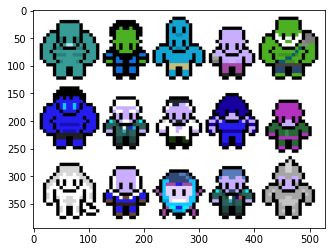

In [128]:
plt.imshow(image)
#cv2.waitKey(0)

In [129]:
for i in range(total):
    
    img = cv2.imread(folder + str(i) + '.jpg')

    # convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # invert gray image
    gray = 255 - gray

    # threshold
    thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)[1]

    # apply close and open morphology to fill tiny black and white holes and save as mask
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # get contours (presumably just one around the nonzero pixels) 
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0] if len(contours) == 2 else contours[1]
    cntr = contours[0]
    x,y,w,h = cv2.boundingRect(cntr)

    # make background transparent by placing the mask into the alpha channel
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    new_img[:, :, 3] = mask

    # then crop it to bounding rectangle
    crop = new_img[y:y+h, x:x+w]
    cv2.imwrite(folder + str(i) + '.jpg', crop)

    # save cropped image
    #cv2.imwrite('cow_thresh.png',thresh)
    #cv2.imwrite('cow_mask.png',mask)
    #cv2.imwrite('cow_transparent_cropped.png',crop)

    # show the images
    #cv2.imshow("THRESH", thresh)
    #cv2.imshow("MASK", mask)
    #cv2.imshow("CROP", crop)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    

In [130]:
for i in range(total):
    img = cv2.imread(folder + str(i) + '.jpg')
    cv2.imwrite(folder + str(i) + '.jpg', cv2.resize(img, (32,32)))

In [131]:
#cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces_df = np.array([cv2.imread(folder + str(i) + '.jpg') for i in range(total)])
#faces_df = np.array([cv2.cvtColor(cv2.imread(folder + str(i) + '.jpg'),cv2.COLOR_BGR2GRAY) for i in range(total)])

In [132]:
faces_df.shape

(669, 32, 32, 3)

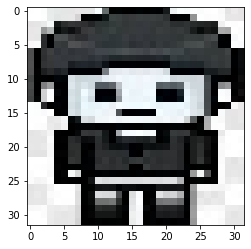

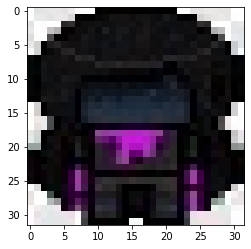

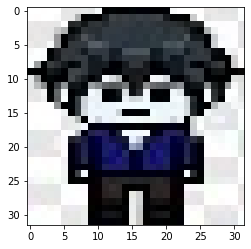

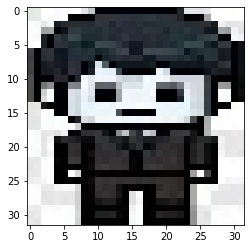

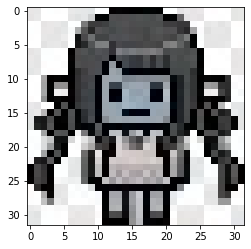

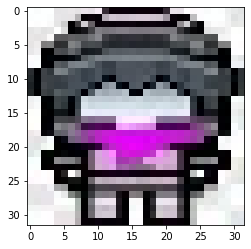

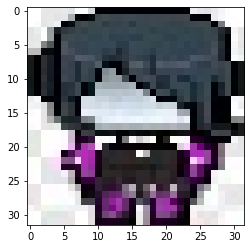

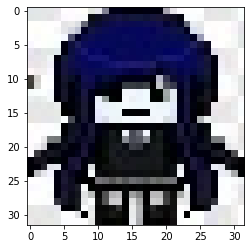

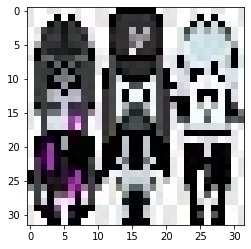

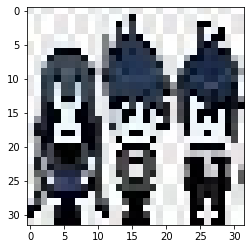

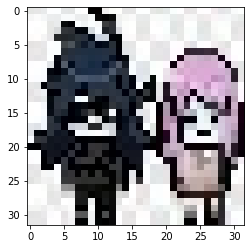

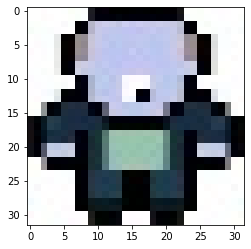

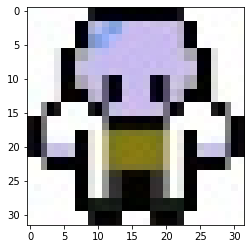

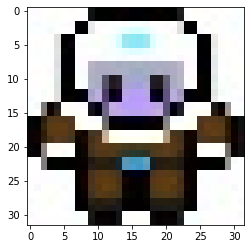

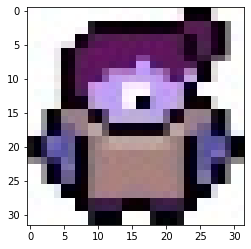

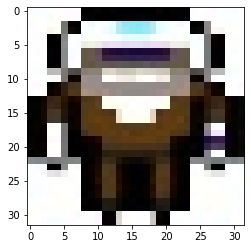

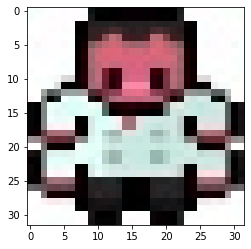

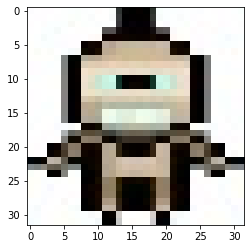

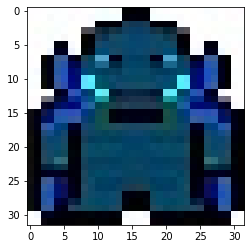

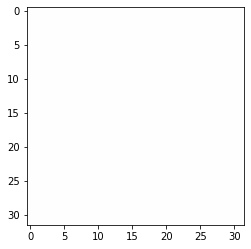

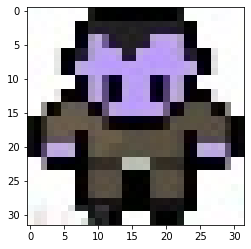

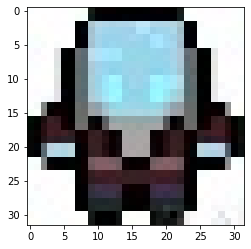

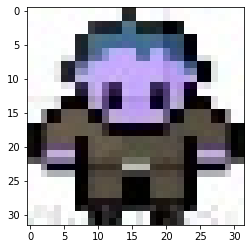

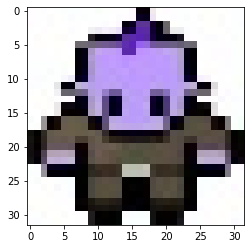

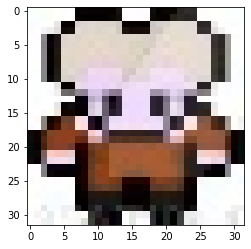

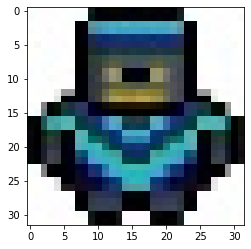

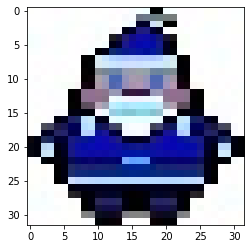

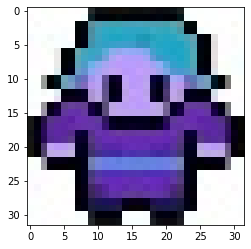

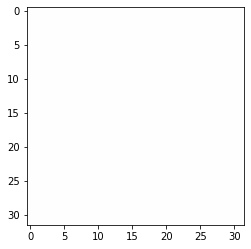

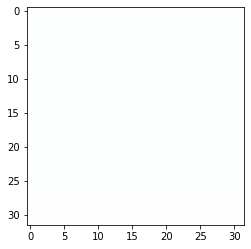

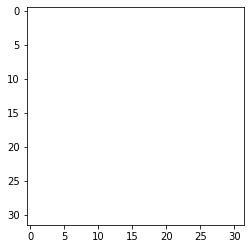

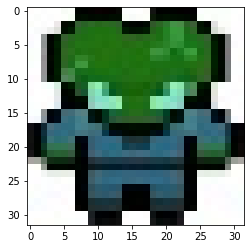

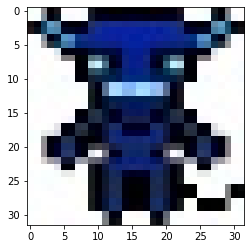

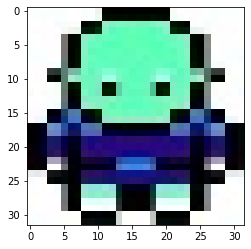

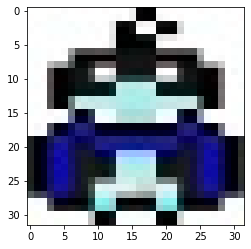

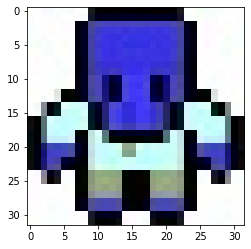

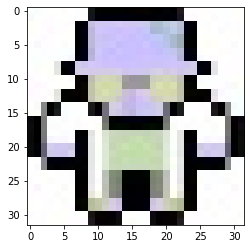

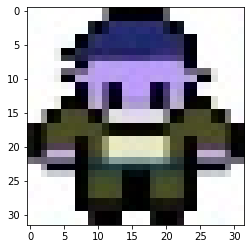

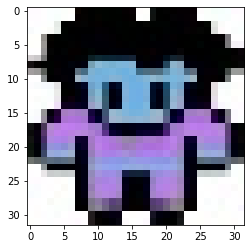

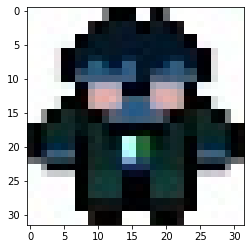

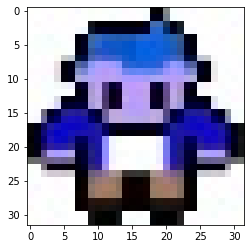

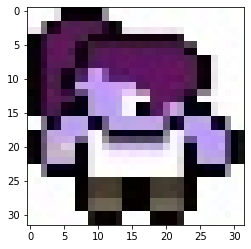

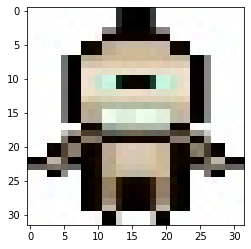

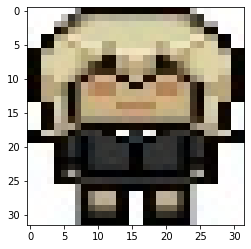

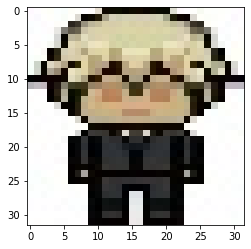

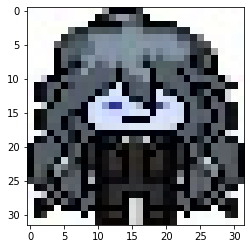

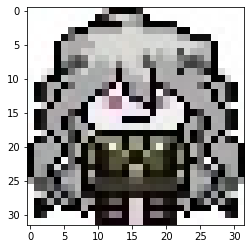

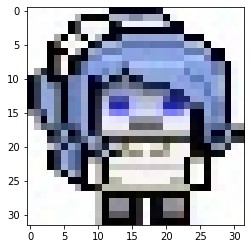

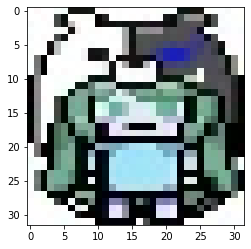

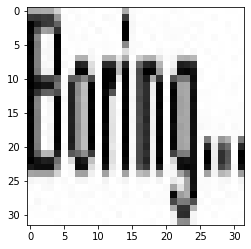

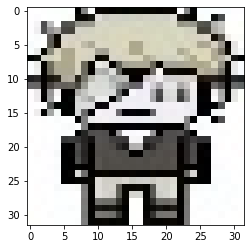

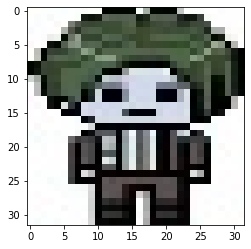

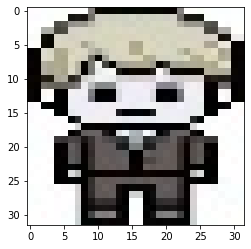

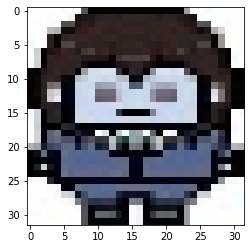

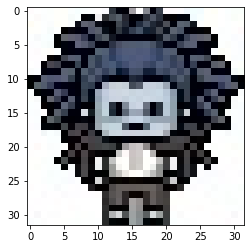

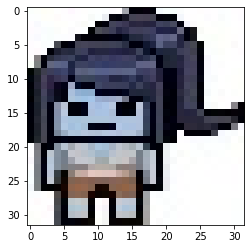

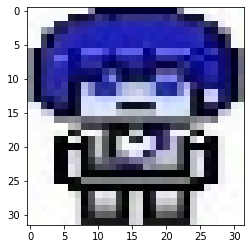

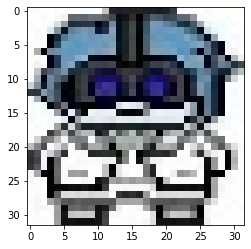

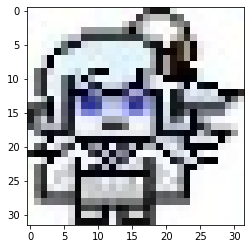

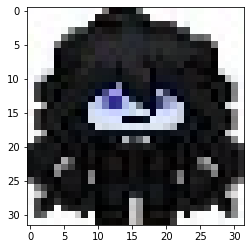

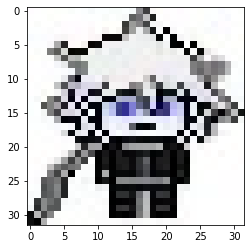

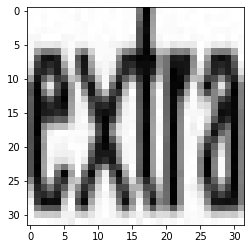

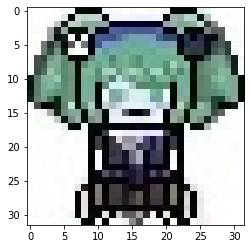

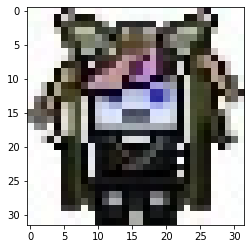

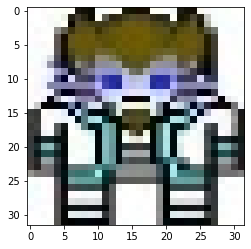

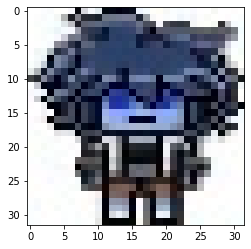

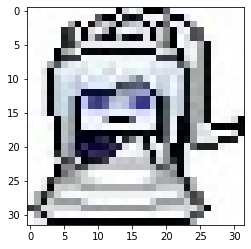

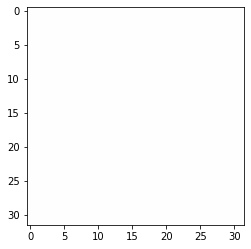

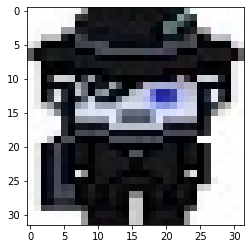

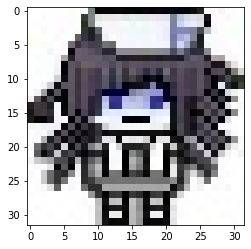

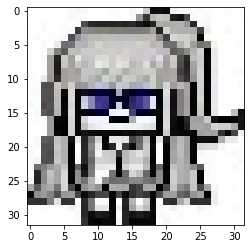

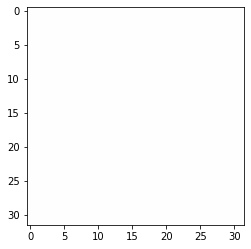

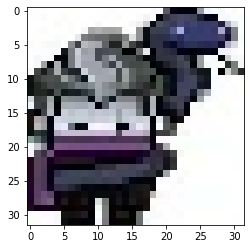

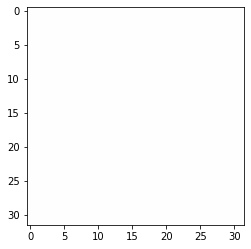

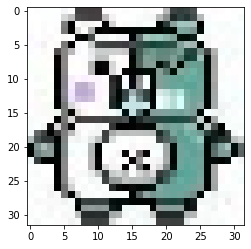

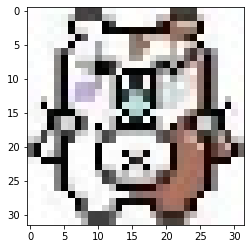

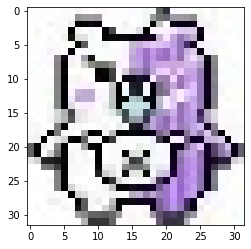

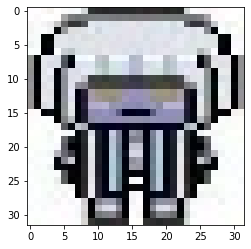

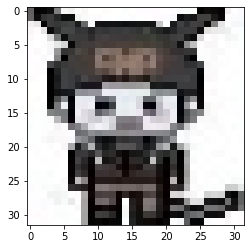

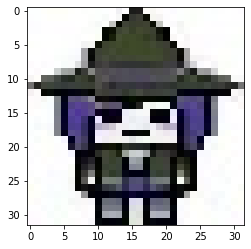

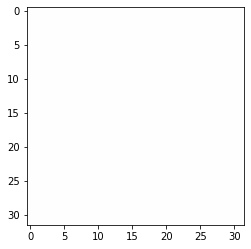

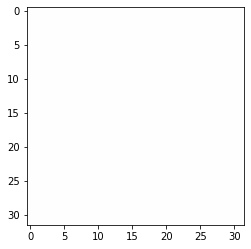

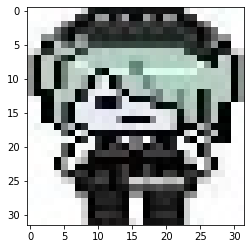

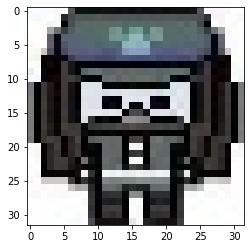

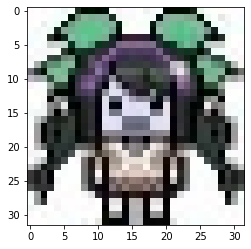

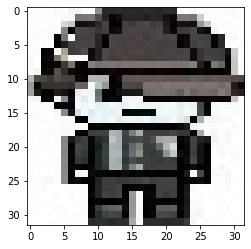

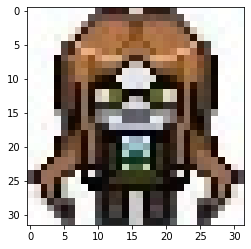

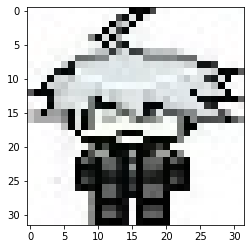

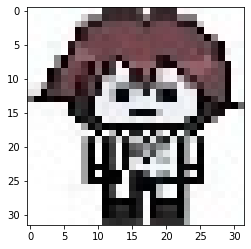

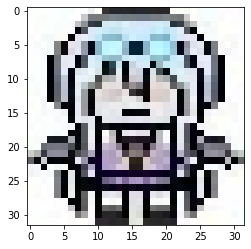

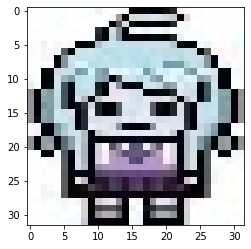

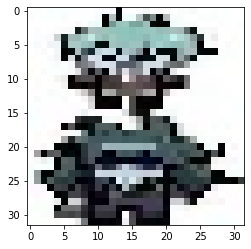

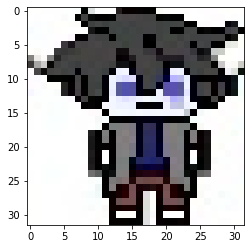

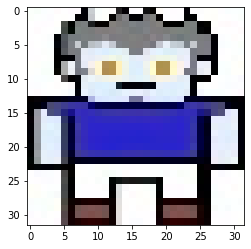

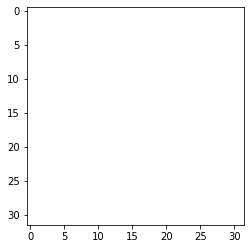

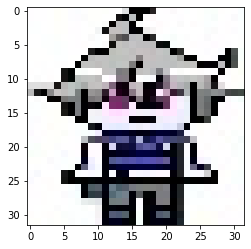

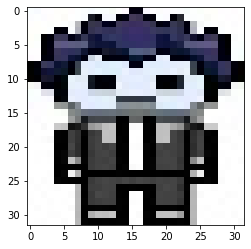

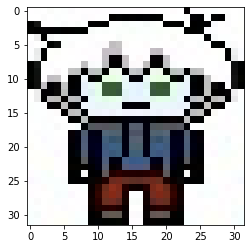

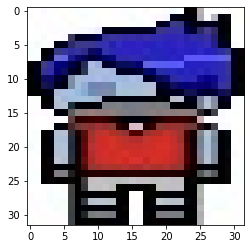

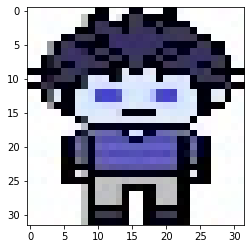

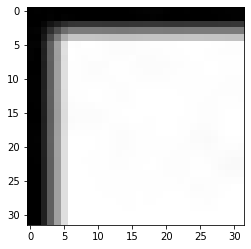

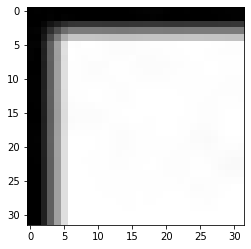

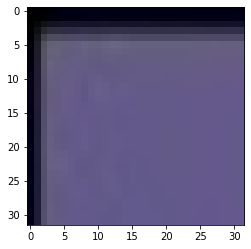

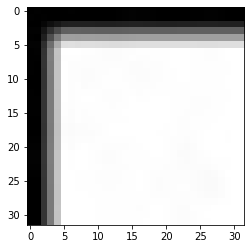

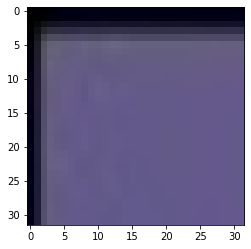

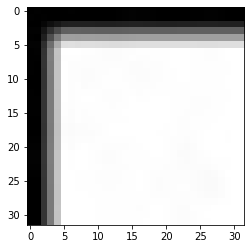

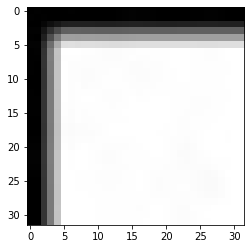

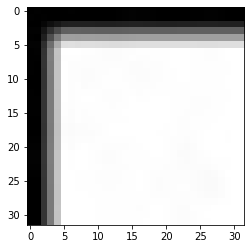

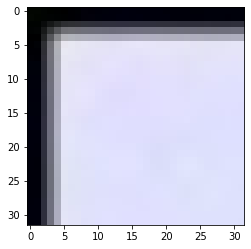

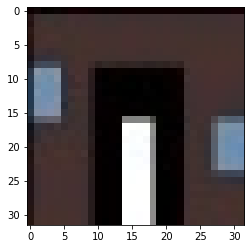

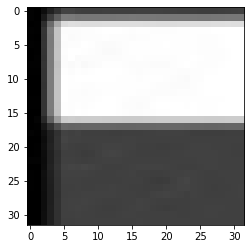

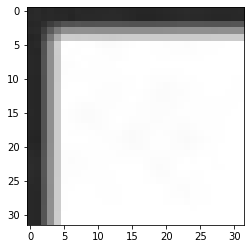

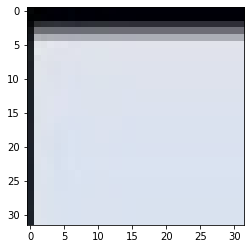

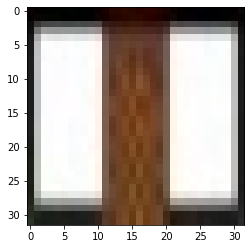

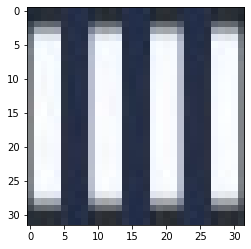

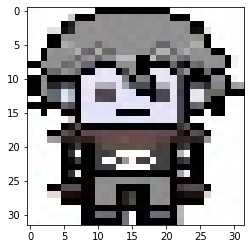

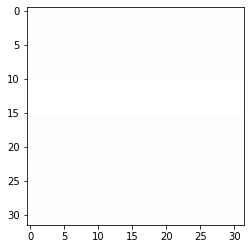

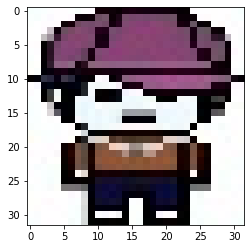

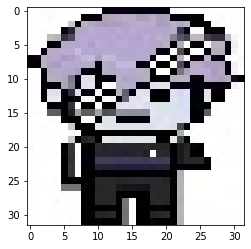

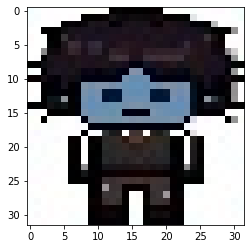

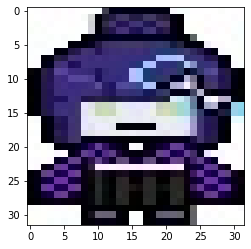

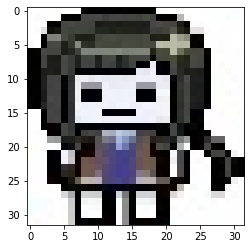

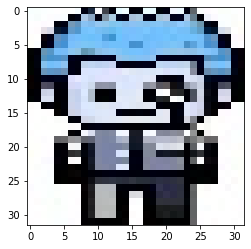

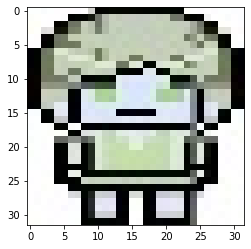

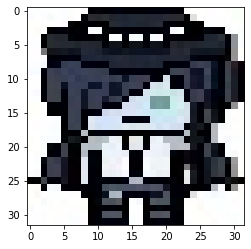

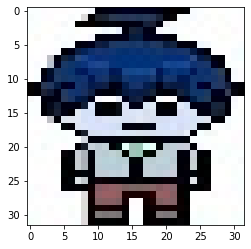

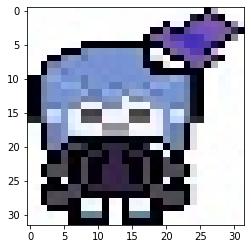

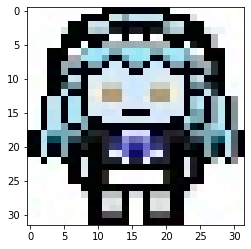

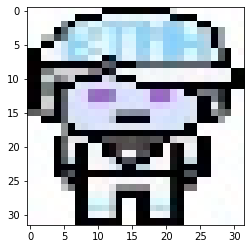

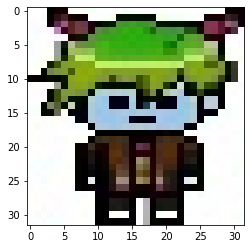

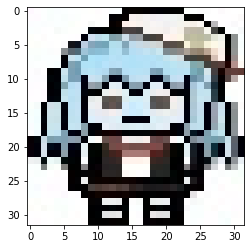

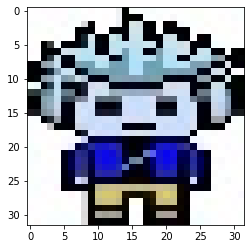

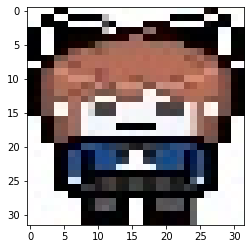

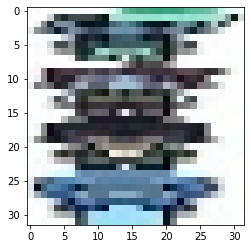

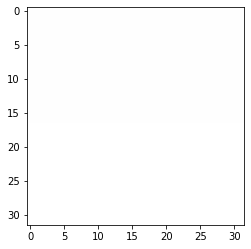

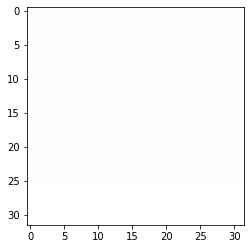

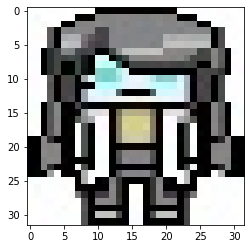

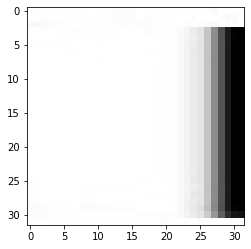

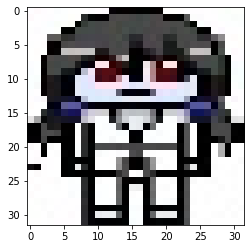

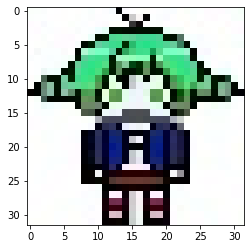

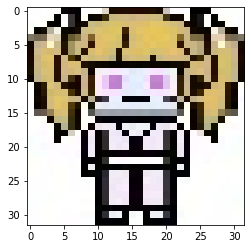

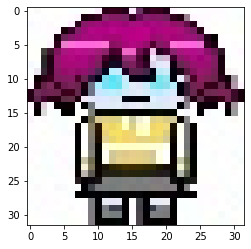

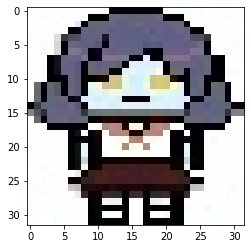

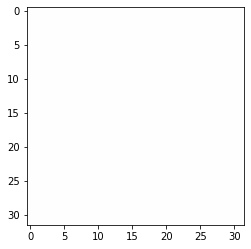

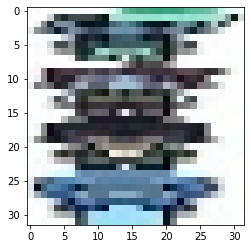

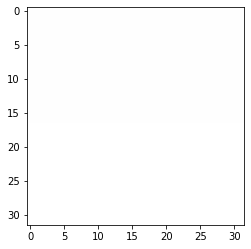

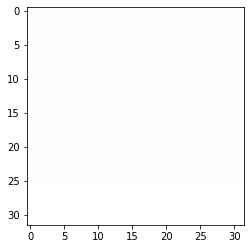

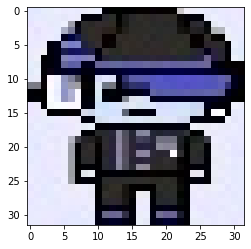

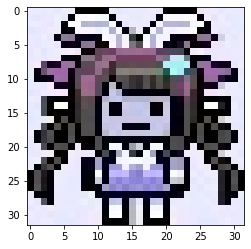

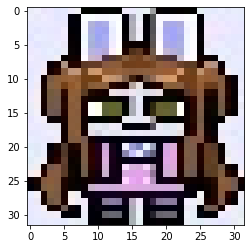

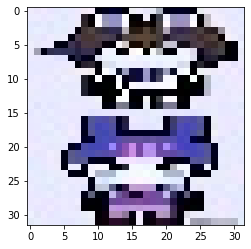

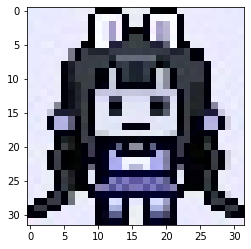

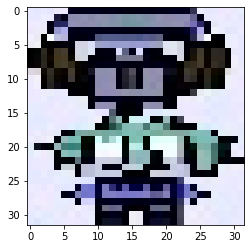

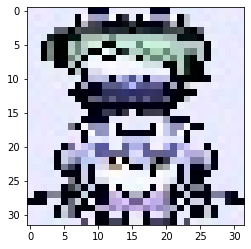

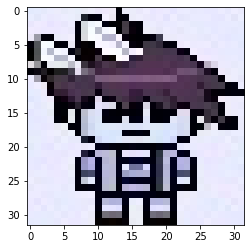

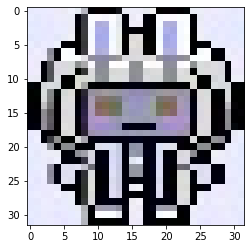

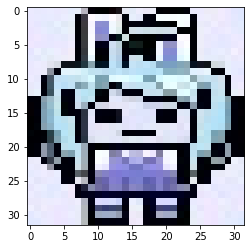

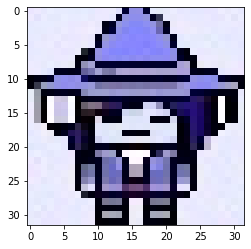

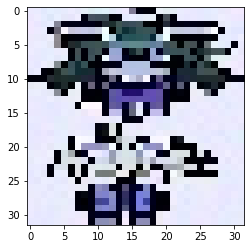

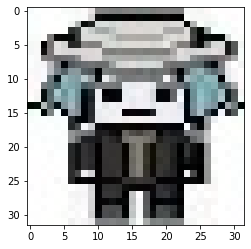

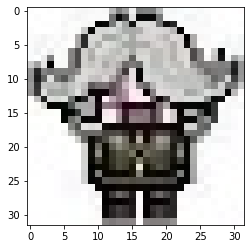

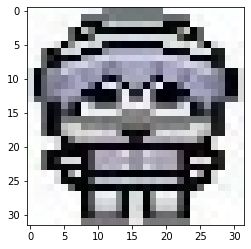

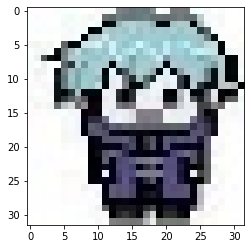

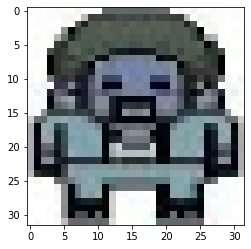

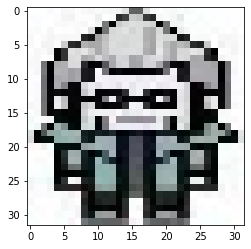

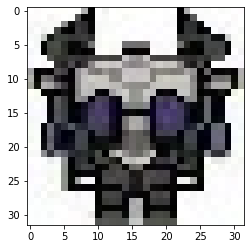

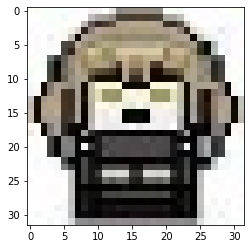

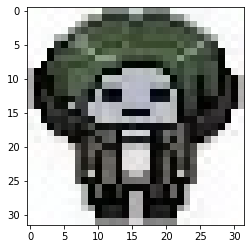

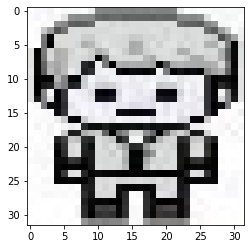

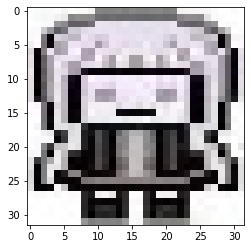

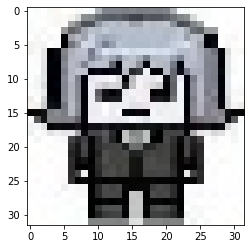

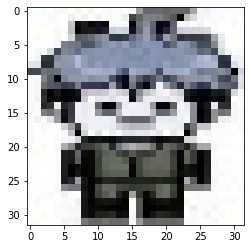

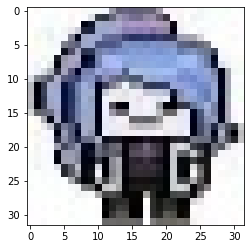

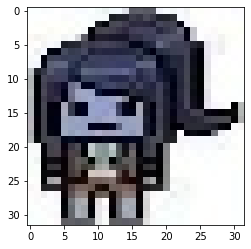

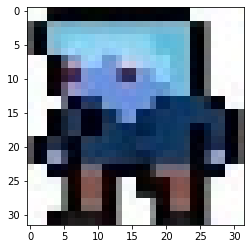

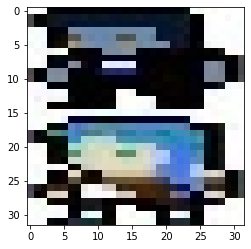

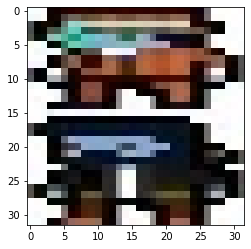

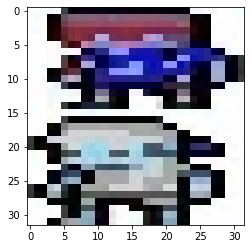

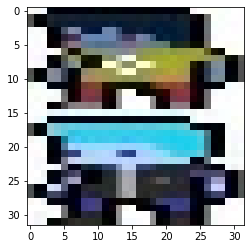

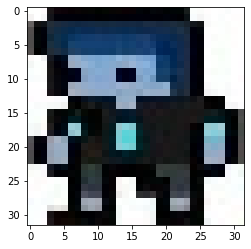

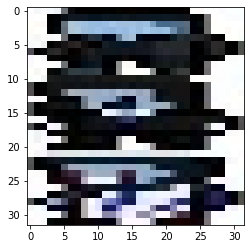

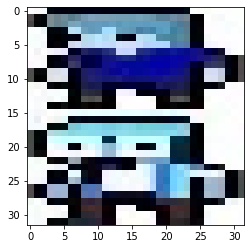

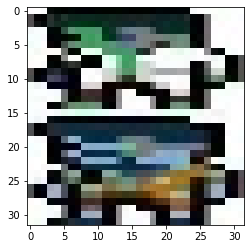

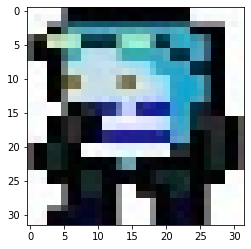

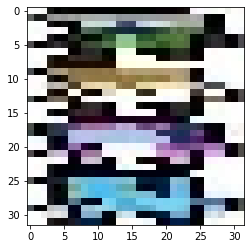

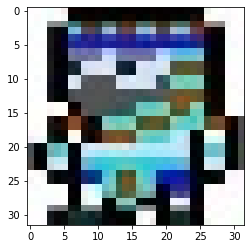

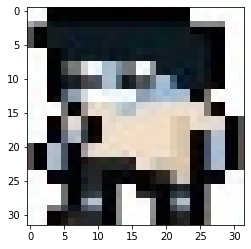

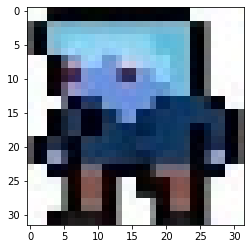

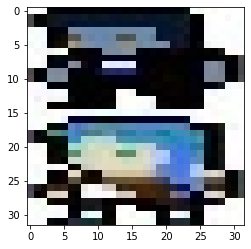

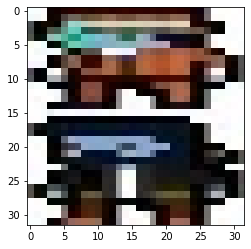

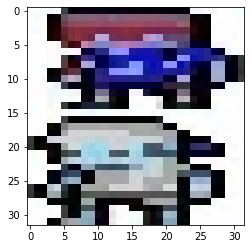

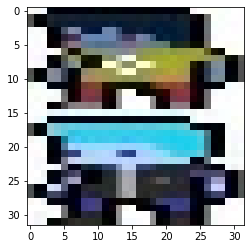

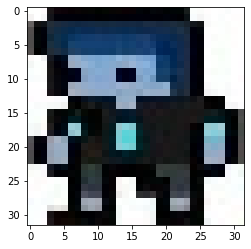

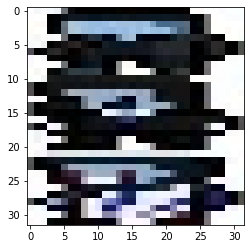

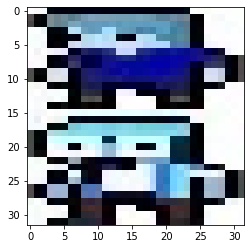

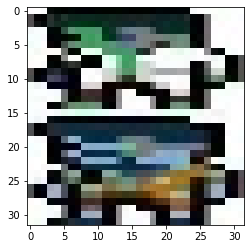

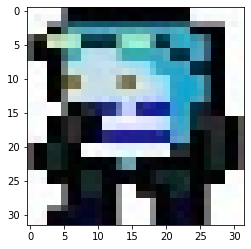

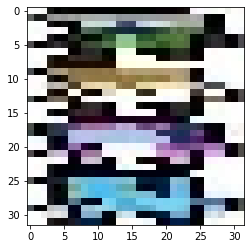

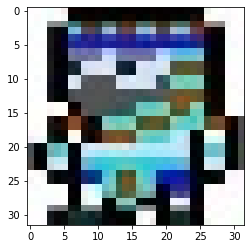

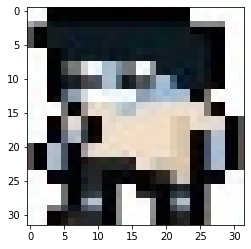

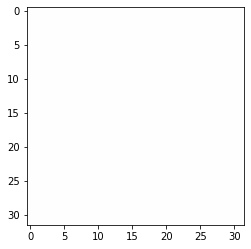

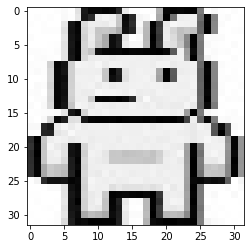

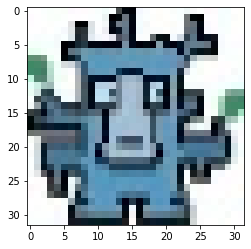

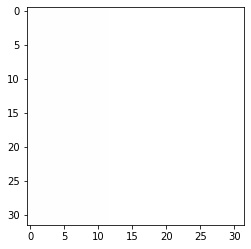

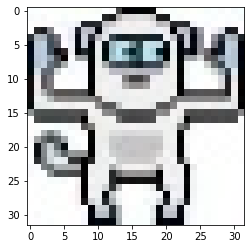

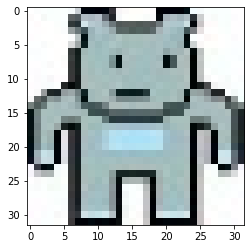

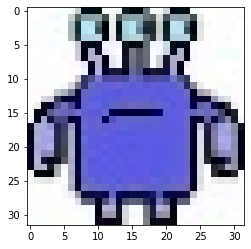

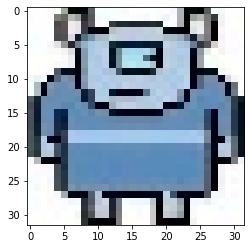

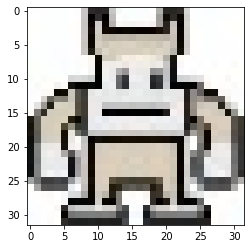

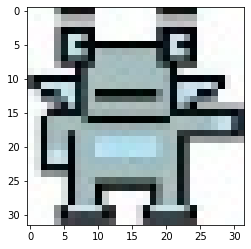

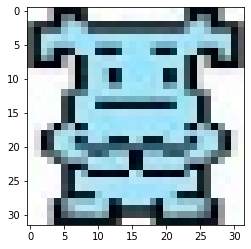

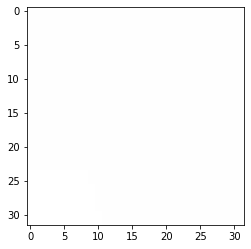

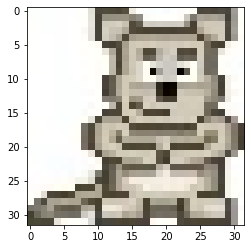

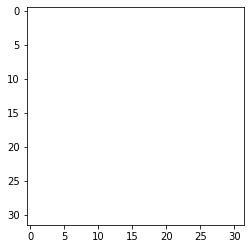

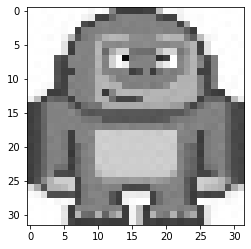

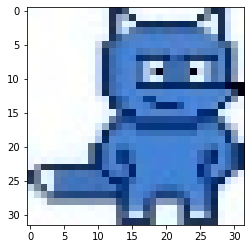

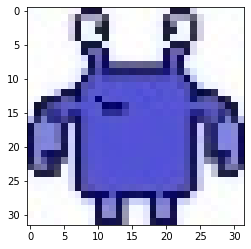

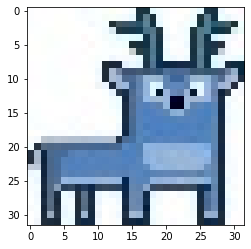

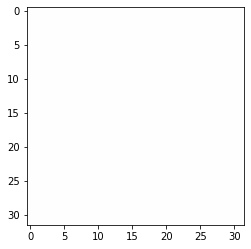

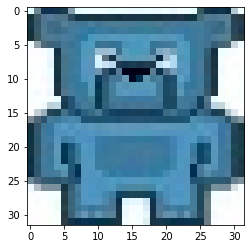

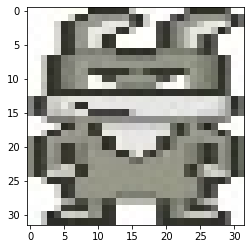

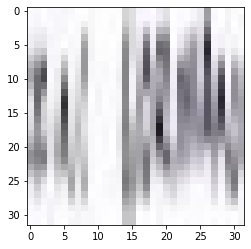

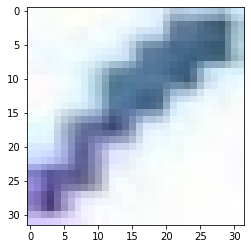

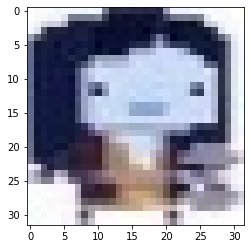

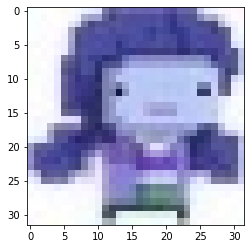

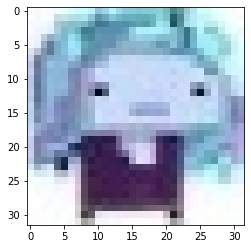

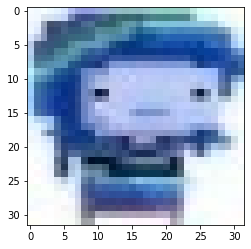

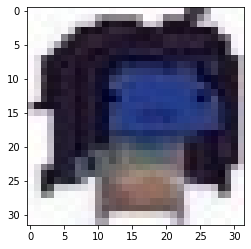

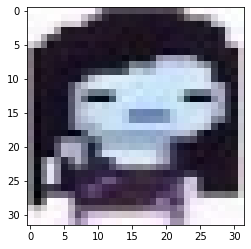

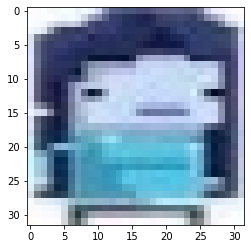

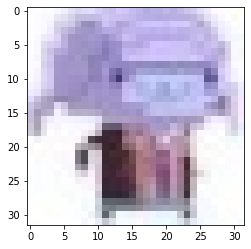

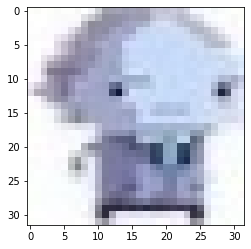

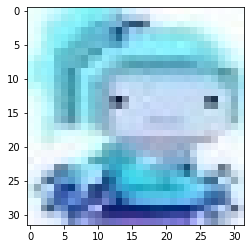

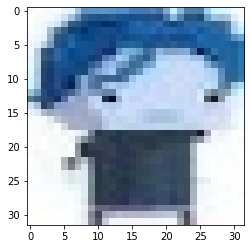

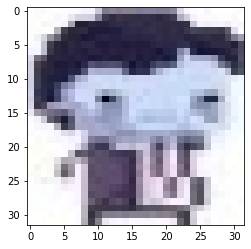

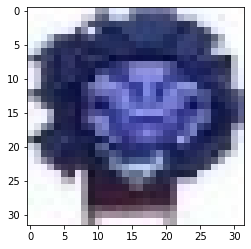

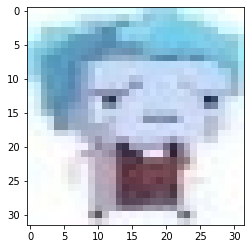

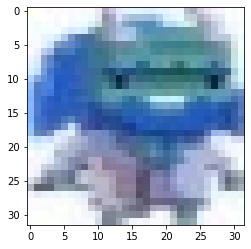

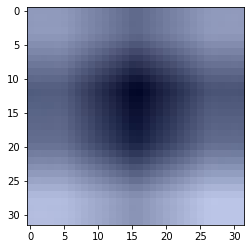

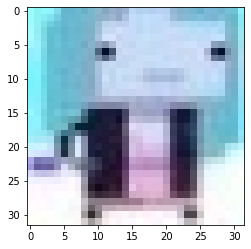

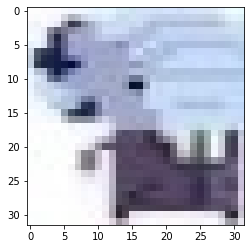

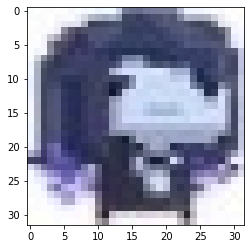

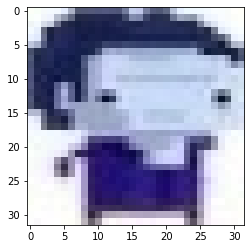

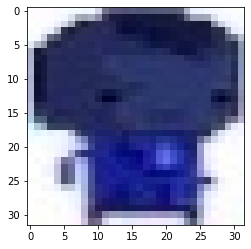

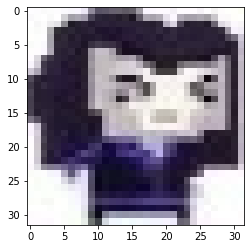

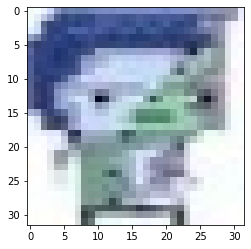

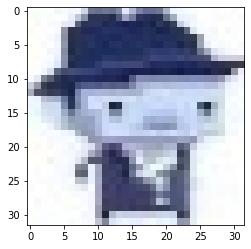

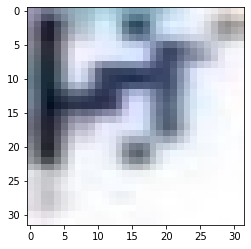

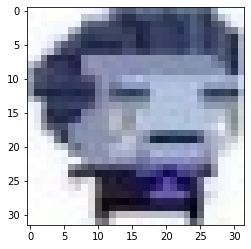

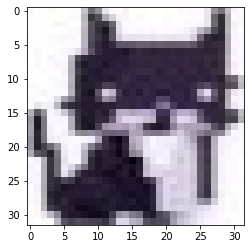

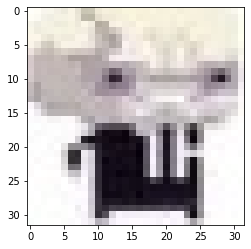

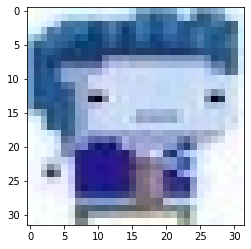

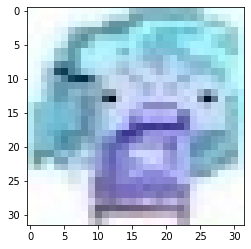

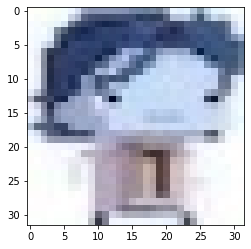

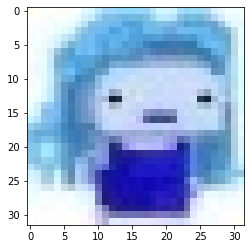

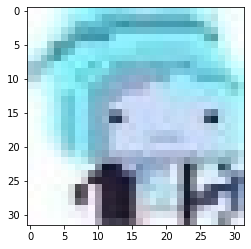

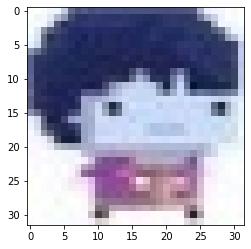

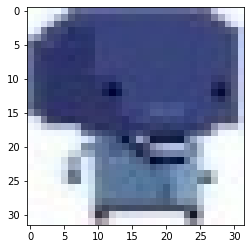

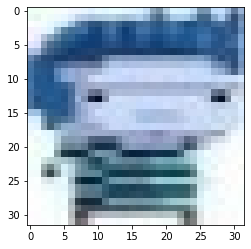

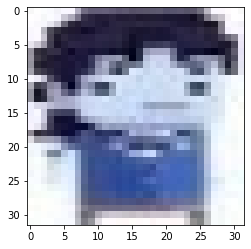

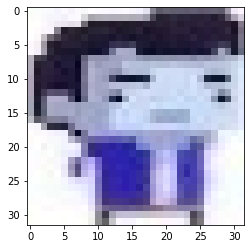

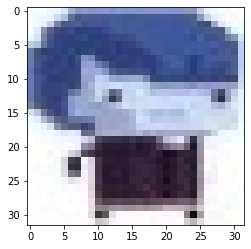

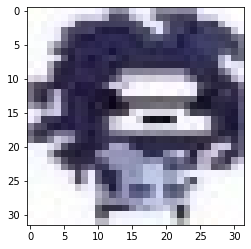

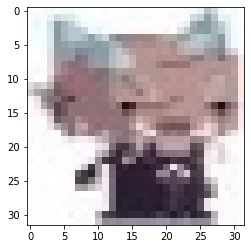

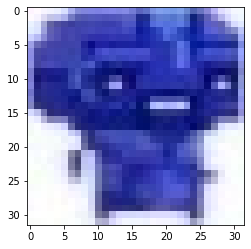

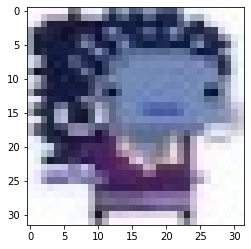

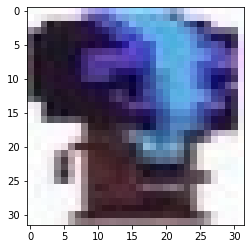

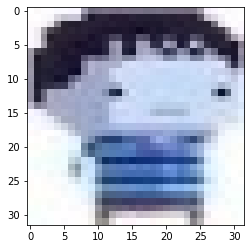

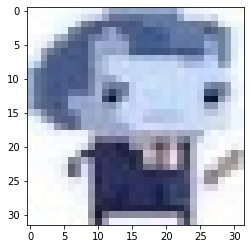

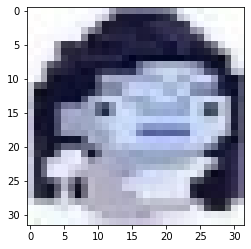

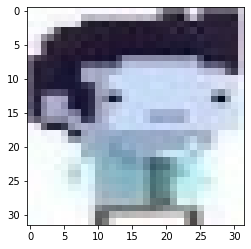

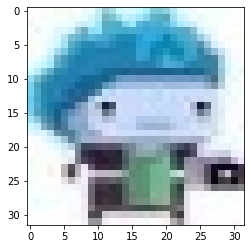

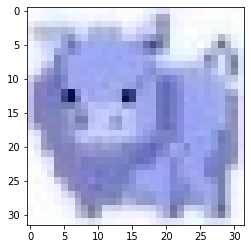

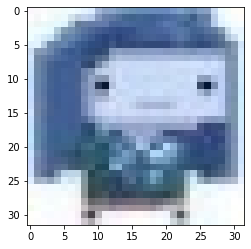

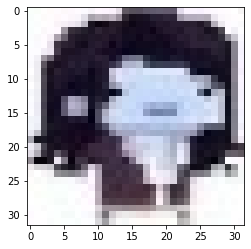

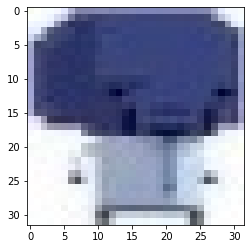

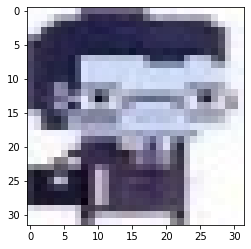

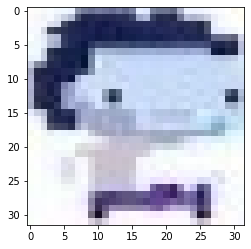

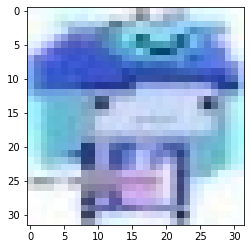

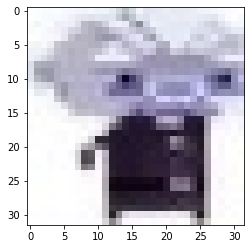

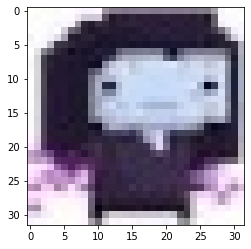

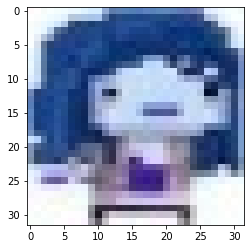

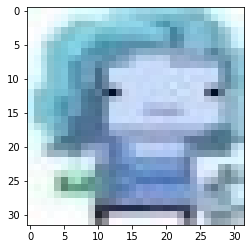

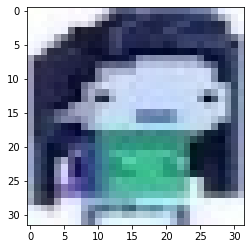

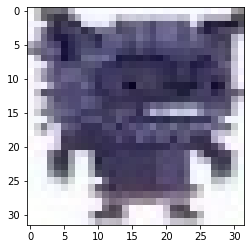

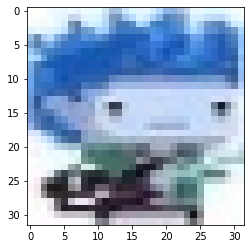

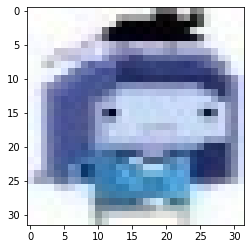

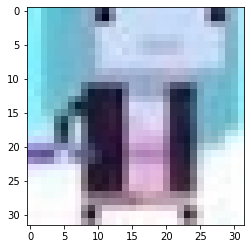

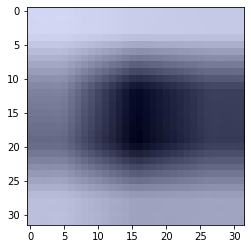

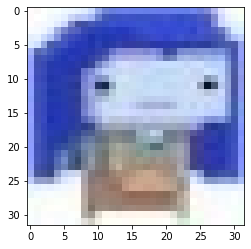

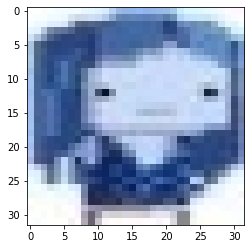

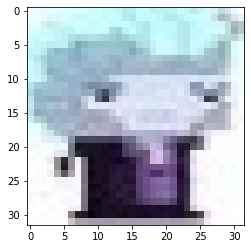

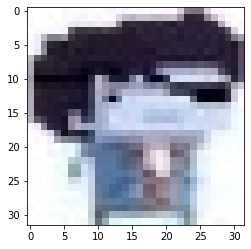

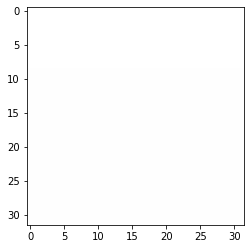

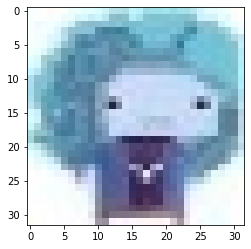

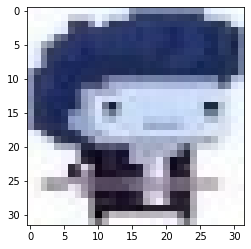

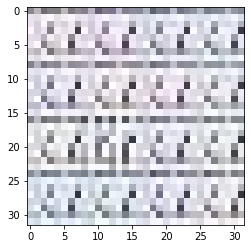

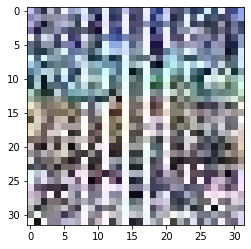

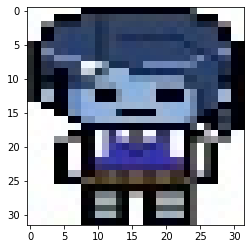

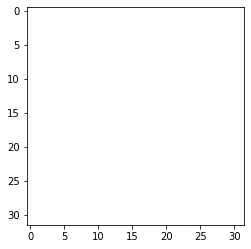

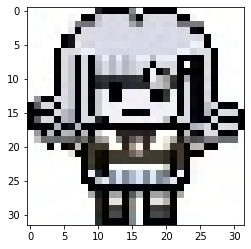

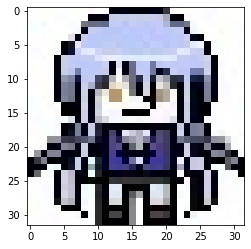

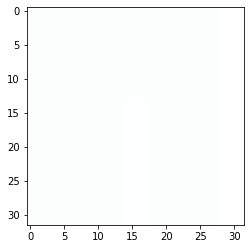

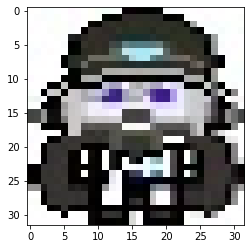

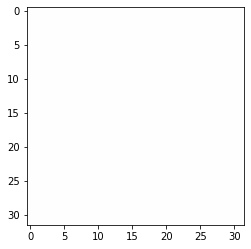

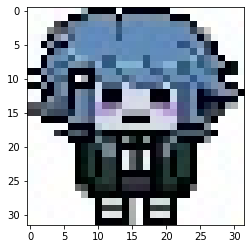

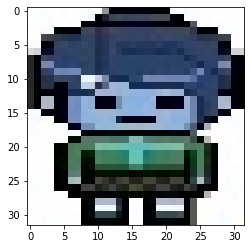

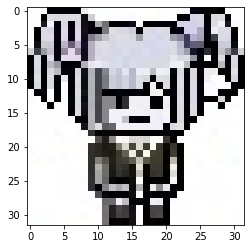

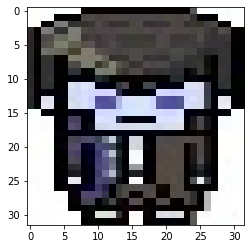

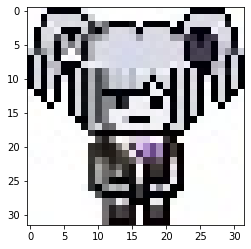

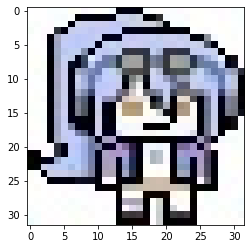

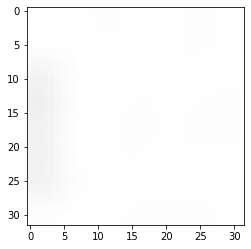

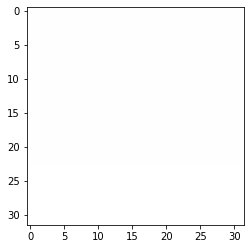

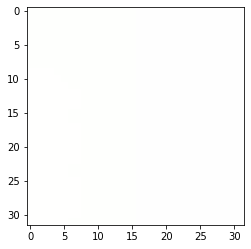

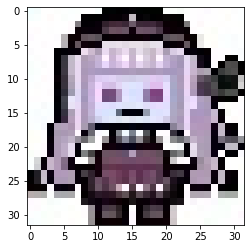

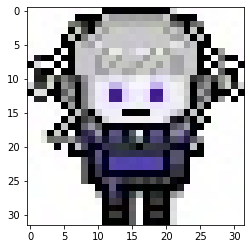

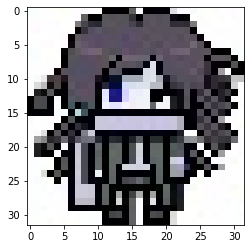

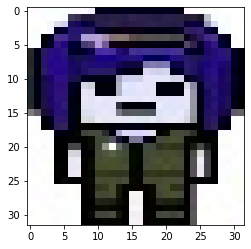

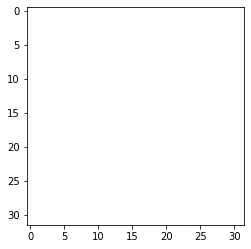

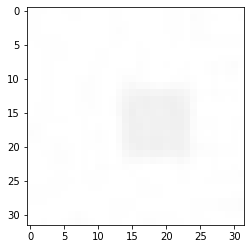

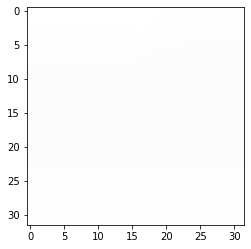

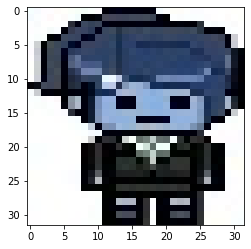

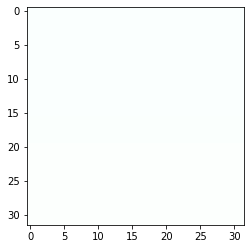

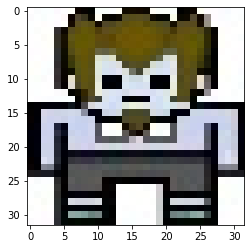

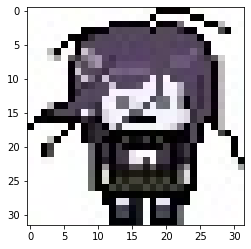

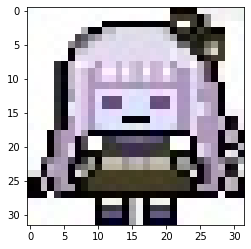

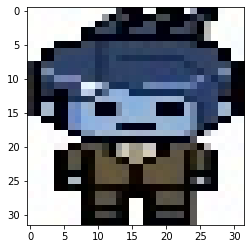

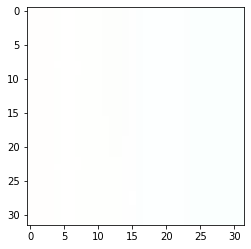

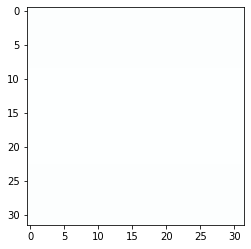

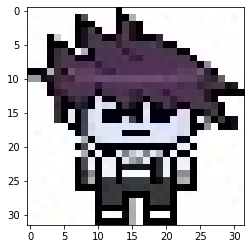

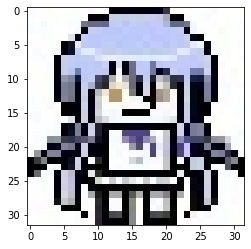

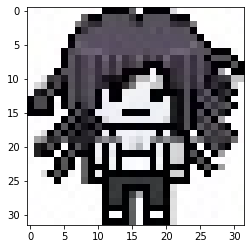

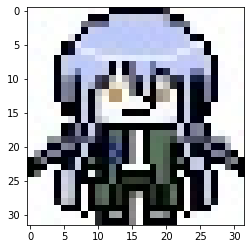

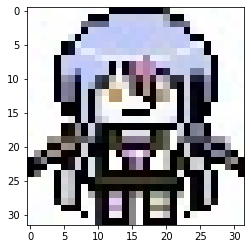

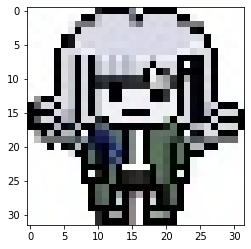

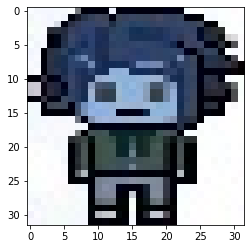

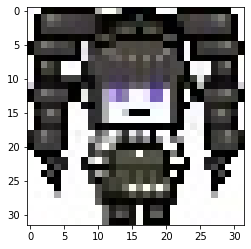

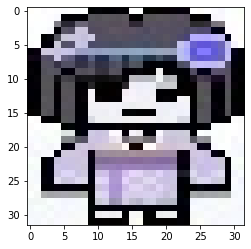

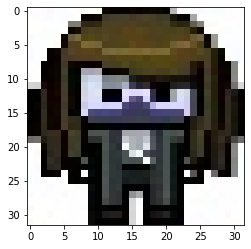

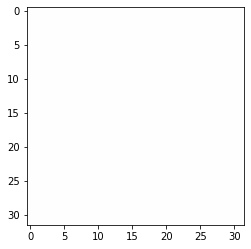

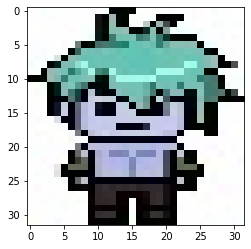

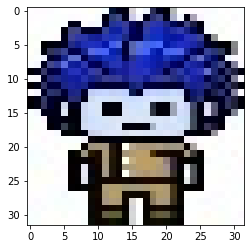

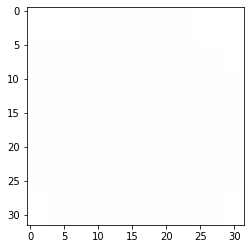

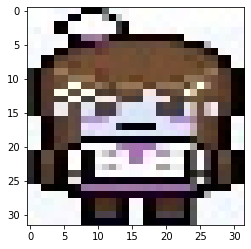

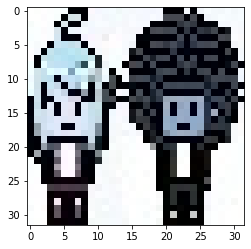

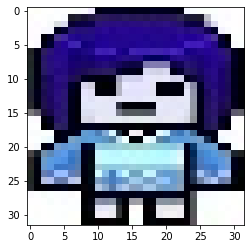

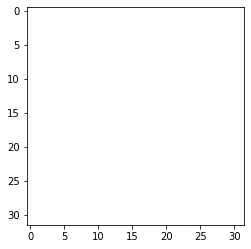

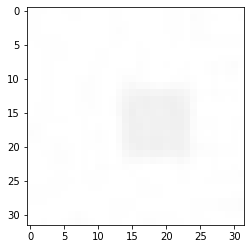

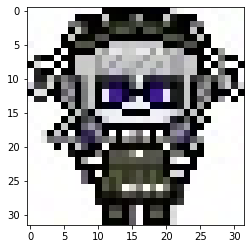

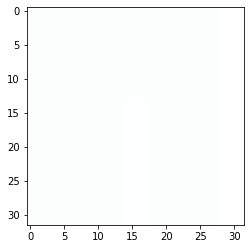

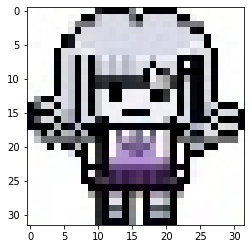

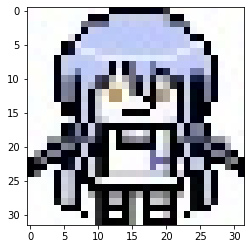

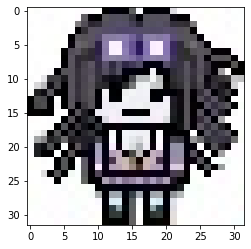

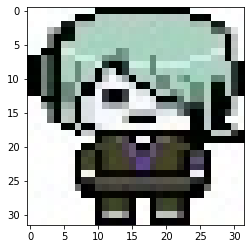

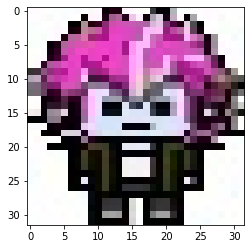

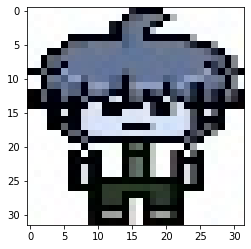

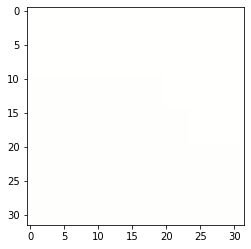

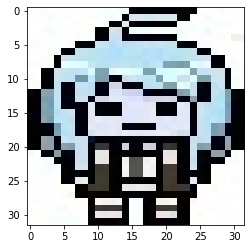

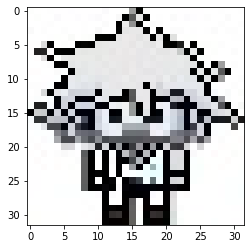

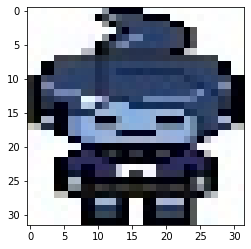

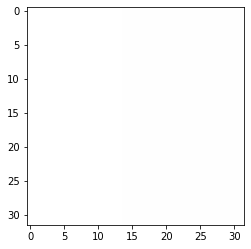

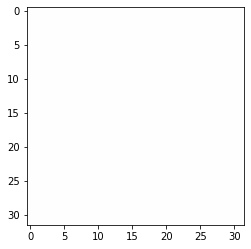

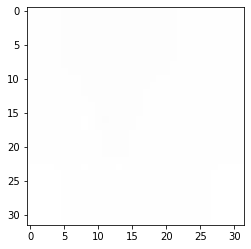

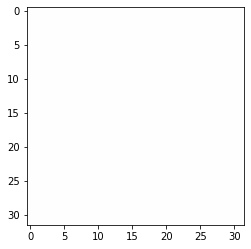

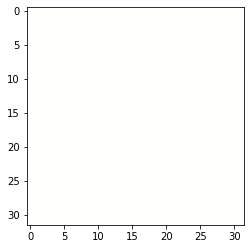

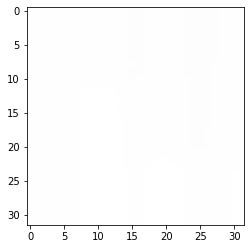

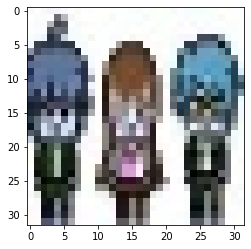

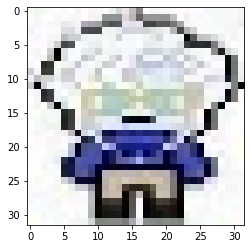

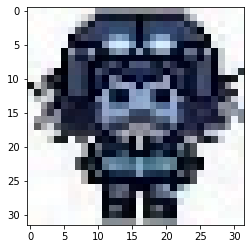

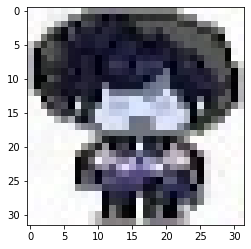

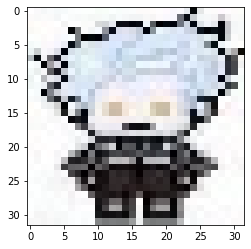

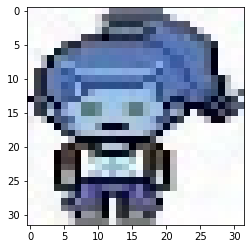

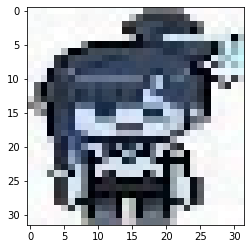

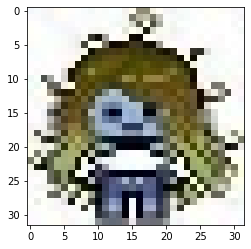

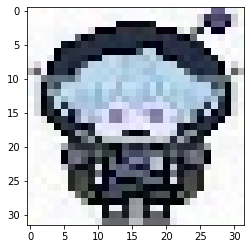

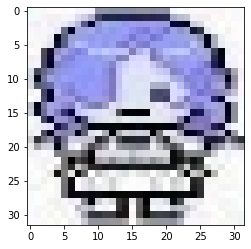

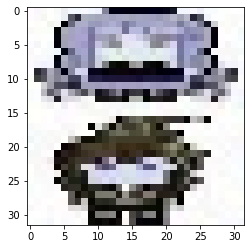

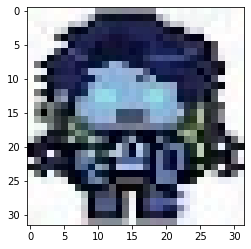

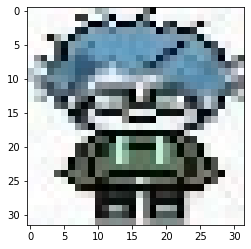

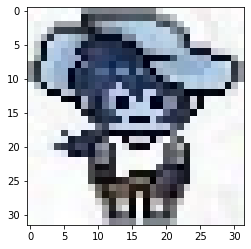

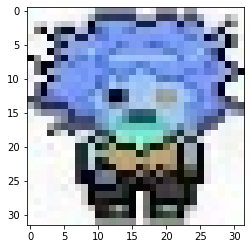

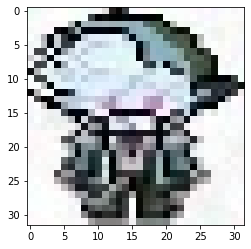

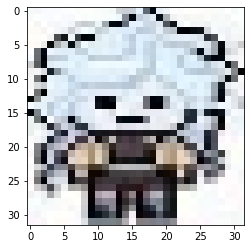

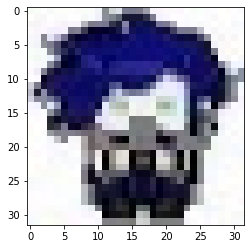

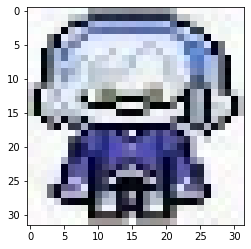

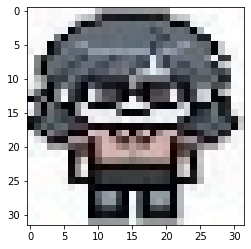

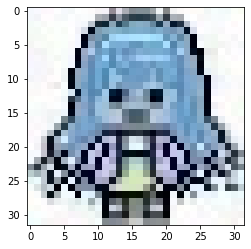

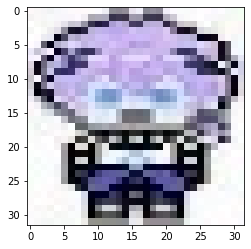

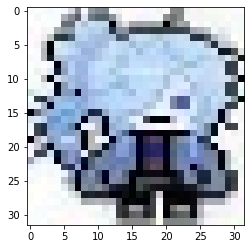

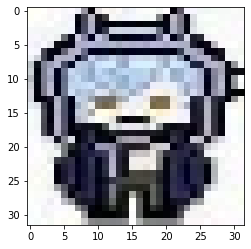

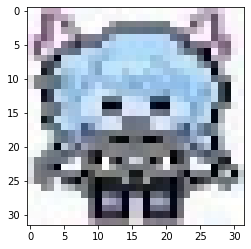

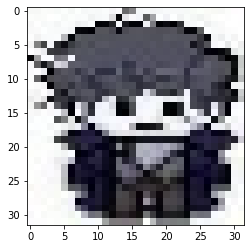

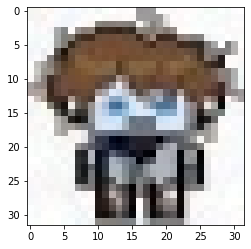

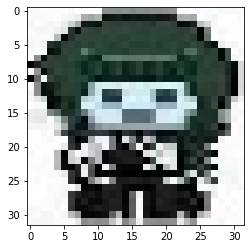

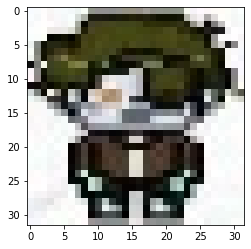

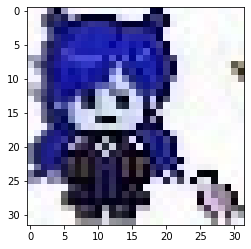

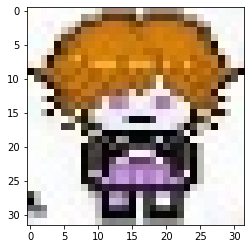

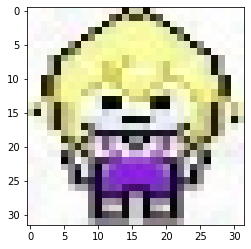

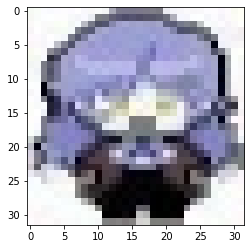

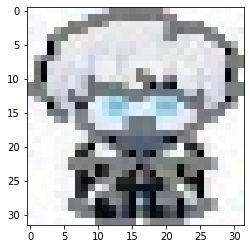

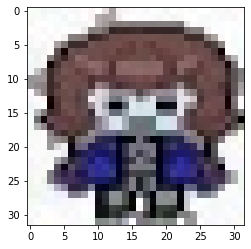

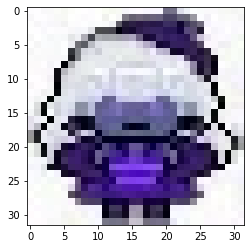

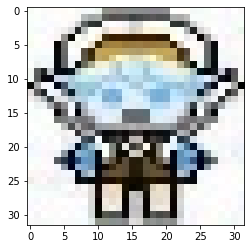

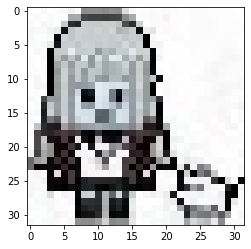

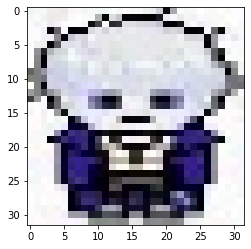

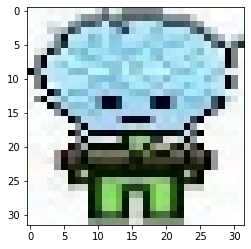

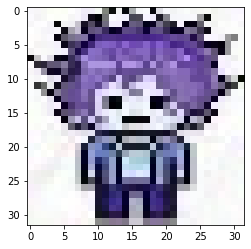

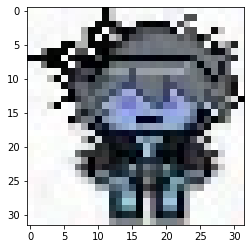

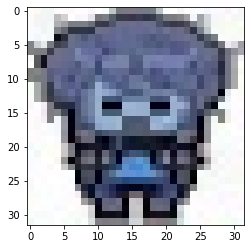

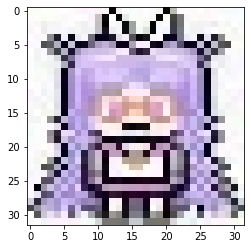

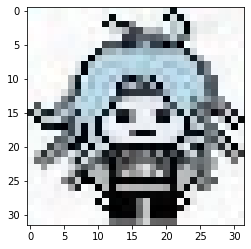

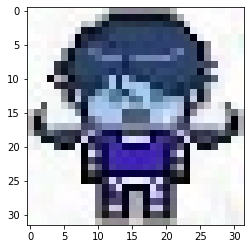

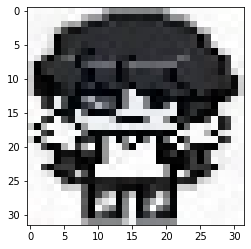

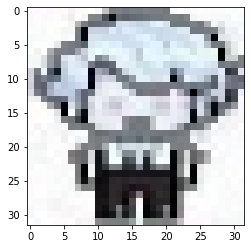

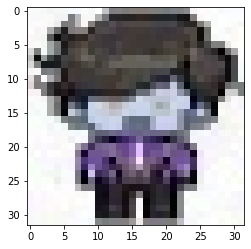

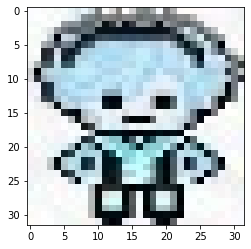

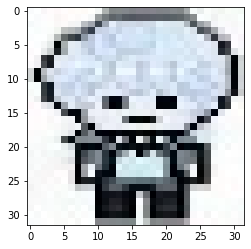

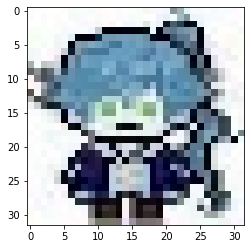

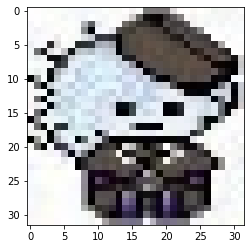

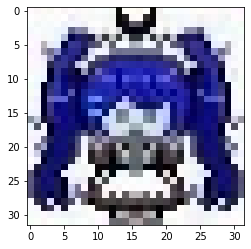

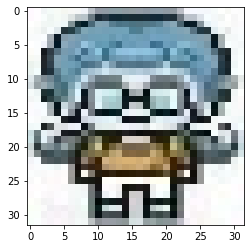

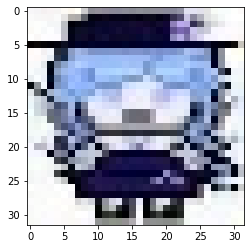

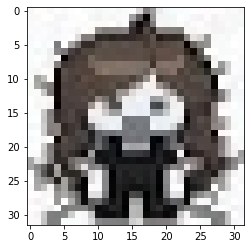

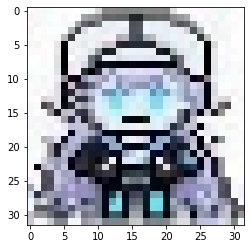

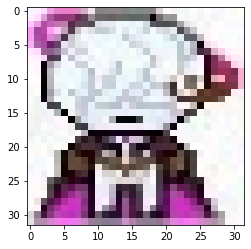

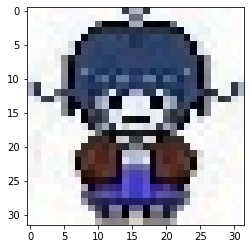

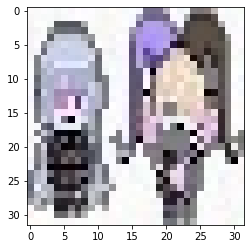

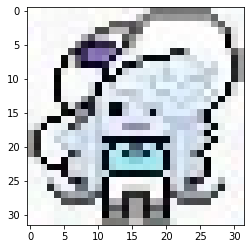

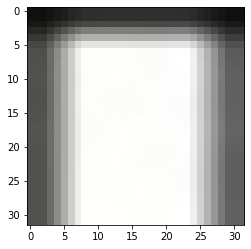

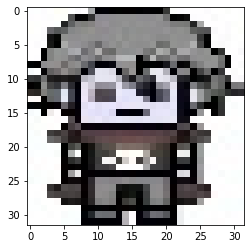

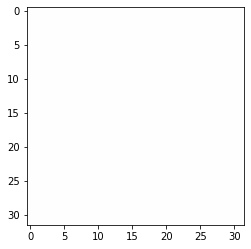

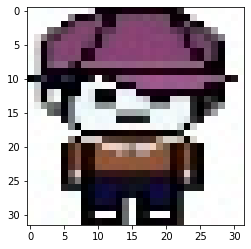

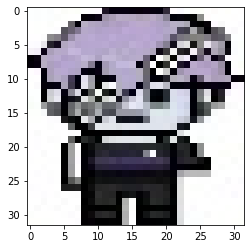

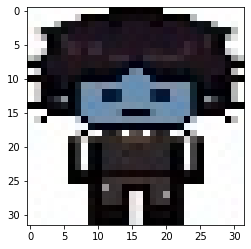

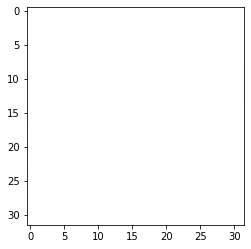

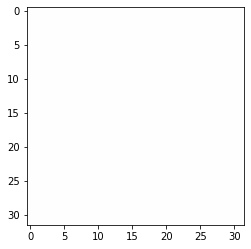

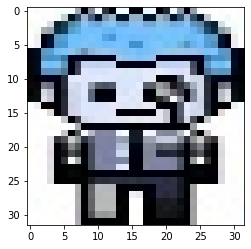

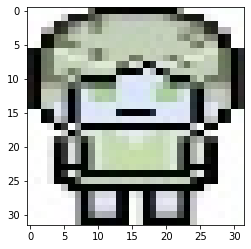

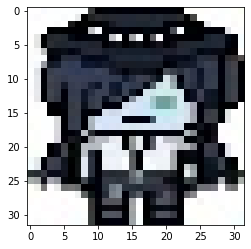

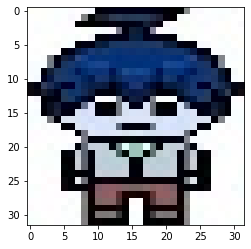

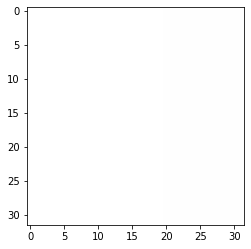

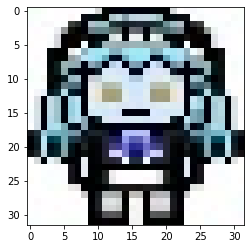

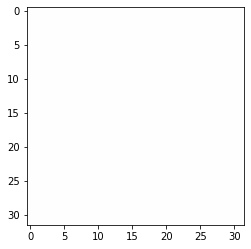

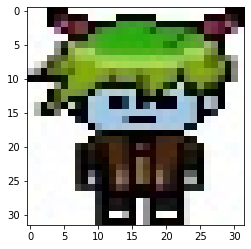

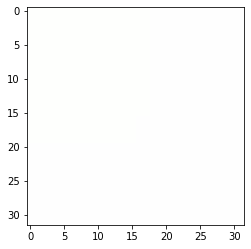

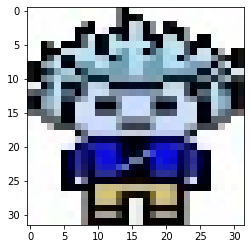

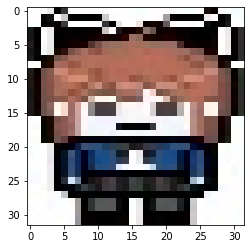

In [24]:
for i in faces_df:
    plt.imshow(i)
    plt.show()

In [133]:
np.save('sprites', faces_df)

In [140]:
df = np.squeeze(np.reshape(faces_df, (669,32*32,-32,1)))

In [141]:
df.shape

(669, 1024, 3)

In [142]:
32*32

1024

In [144]:
df = np.squeeze(np.reshape(df, (669,1024,3)))

In [146]:
df = np.squeeze(np.reshape(df, (669,1024*3)))

In [147]:
df.shape

(669, 3072)

In [148]:
x_3d = x_3d.reshape(669, 2)

ValueError: cannot reshape array of size 894 into shape (669,2)

In [151]:
model = KMeans(n_clusters=2)
model.fit(x_3d)
all_predictions = model.predict(x_3d).reshape(669,1)
conc = np.concatenate([x_3d, all_predictions], axis=1)

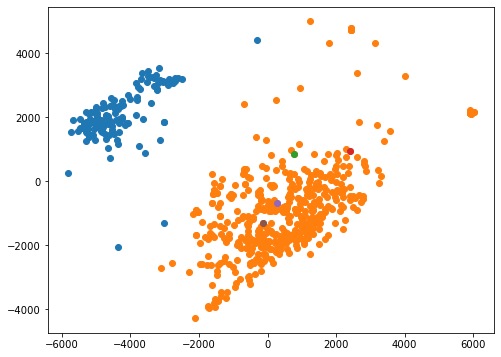

In [152]:
pca3 = PCA(n_components=2)
pca3.fit(df)
x_3d = pca3.transform(df)

plt.figure(figsize=(8,6))
plt.scatter(conc[:,0][conc[:,2]==0], conc[:,1][conc[:,2]==0])
plt.scatter(conc[:,0][conc[:,2]==1], conc[:,1][conc[:,2]==1])
plt.scatter(conc[61,0], conc[61,1])
plt.scatter(conc[49,0], conc[49,1])
plt.scatter(conc[10,0], conc[10,1])
plt.scatter(conc[4,0], conc[4,1])
#circle1 = plt.Circle((500, 0), 1000, color='lime')
#plt.gcf().gca().add_artist(circle1)
plt.show()


In [153]:
conc[:, 0].max()

6022.718444330735

In [154]:
conc[:, 0][conc[:, 2]==1].shape[0] / conc[:, 0][conc[:, 2]==0].shape[0] 

3.883211678832117

0


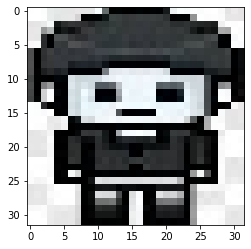

2


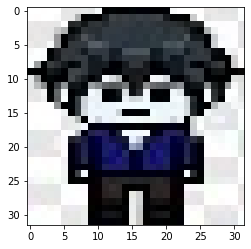

3


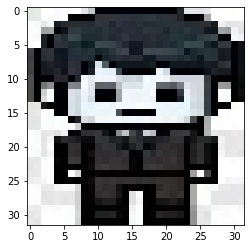

4


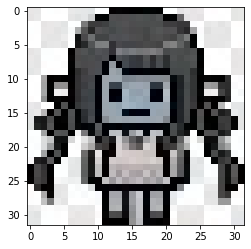

5


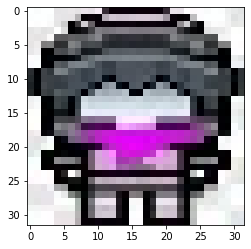

6


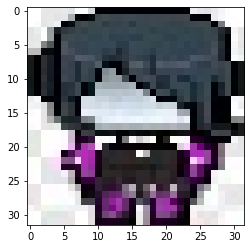

7


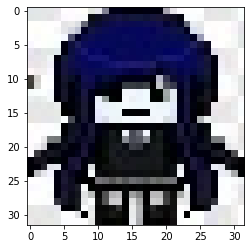

8


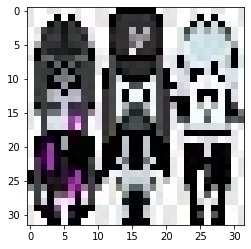

9


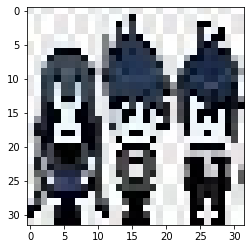

10


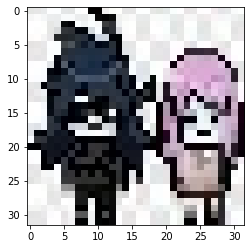

11


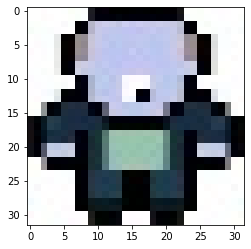

12


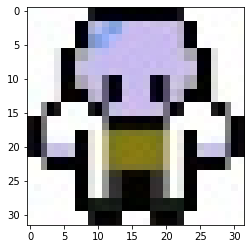

13


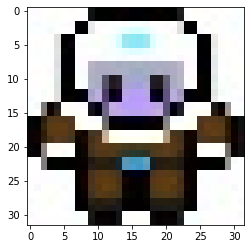

14


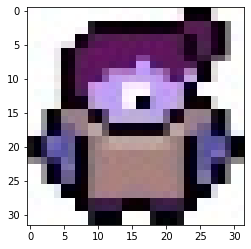

15


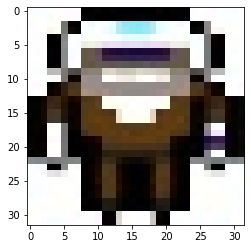

16


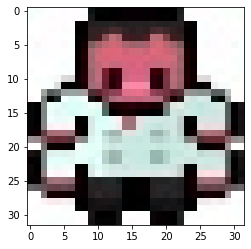

17


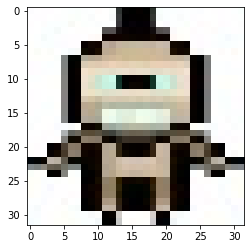

19


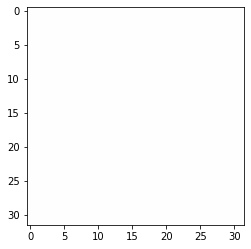

20


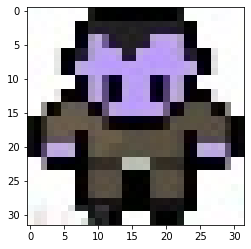

21


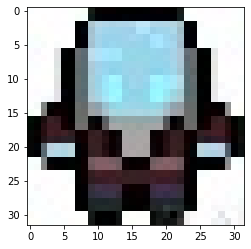

22


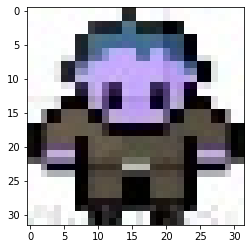

23


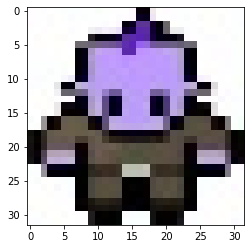

24


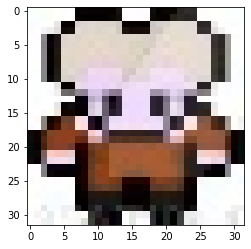

25


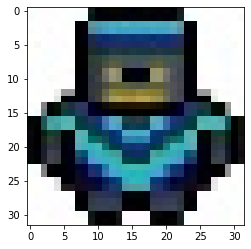

26


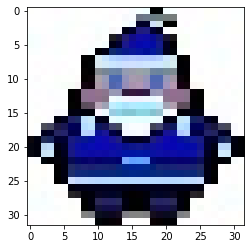

27


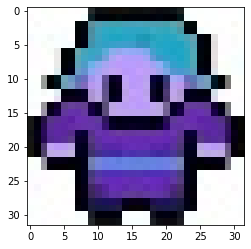

28


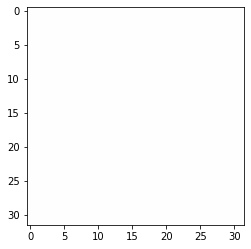

29


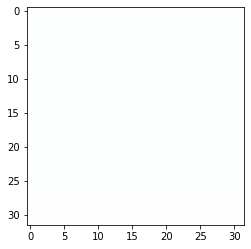

30


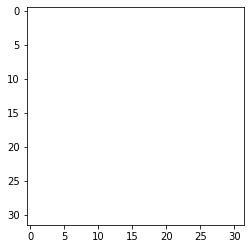

31


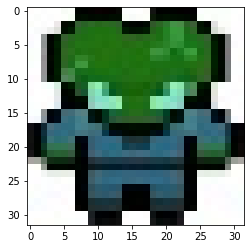

32


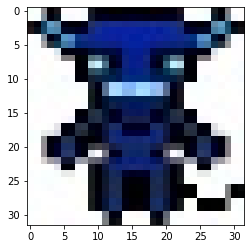

33


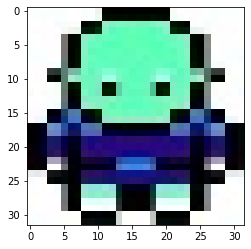

34


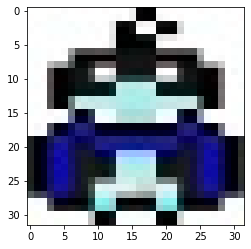

35


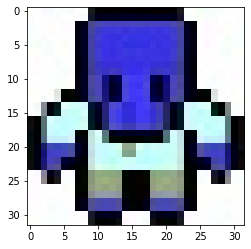

36


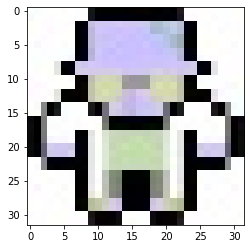

37


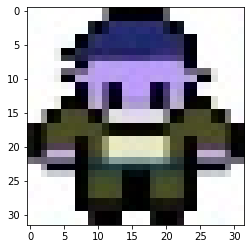

38


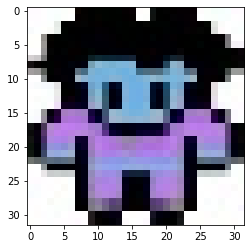

39


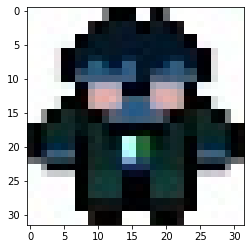

40


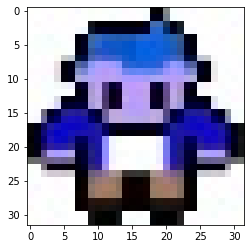

41


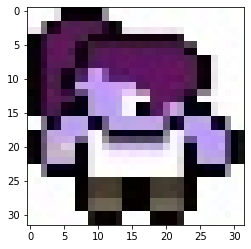

42


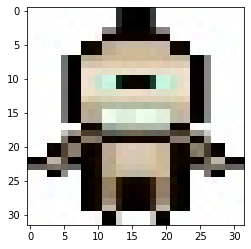

43


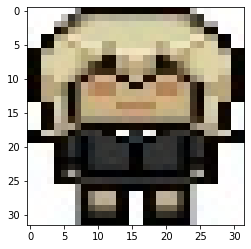

44


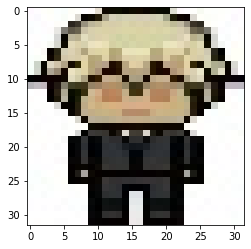

45


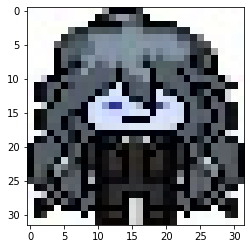

46


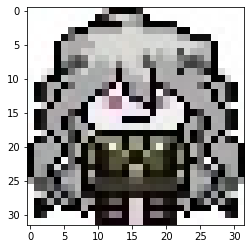

47


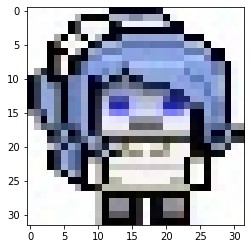

48


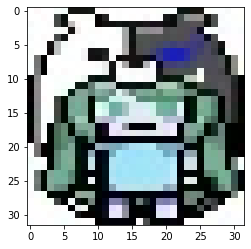

49


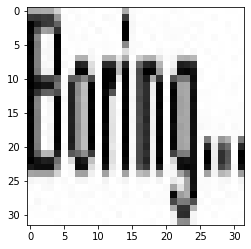

50


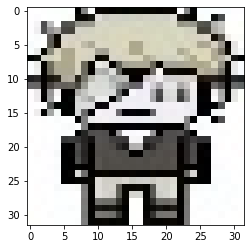

51


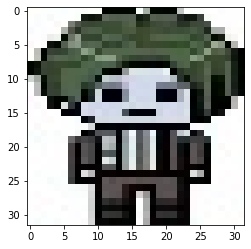

52


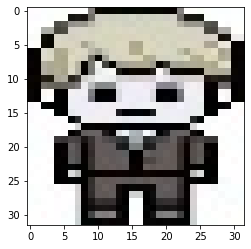

53


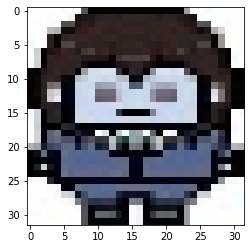

54


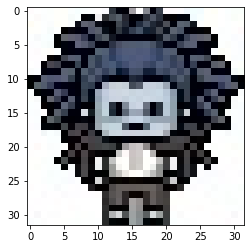

55


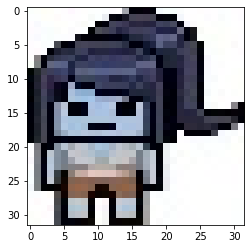

56


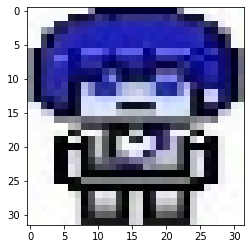

57


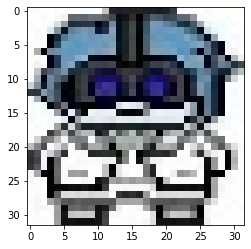

58


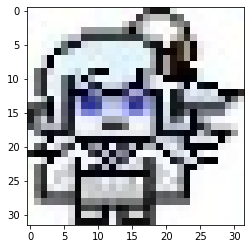

59


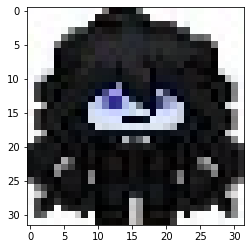

60


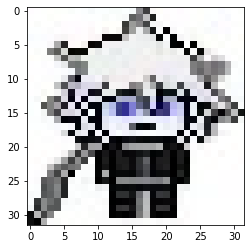

61


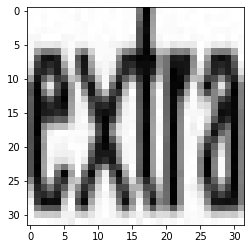

62


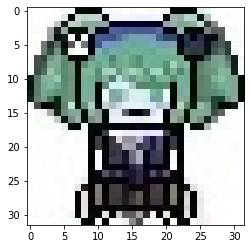

63


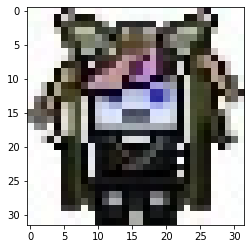

64


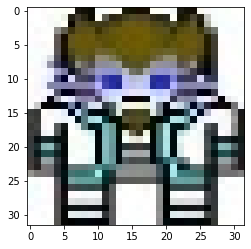

65


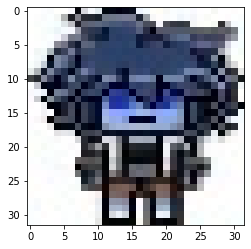

66


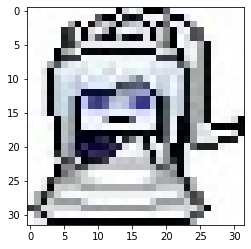

67


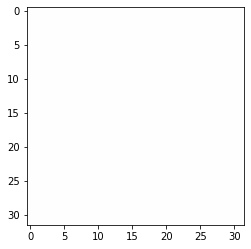

68


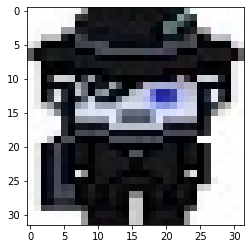

69


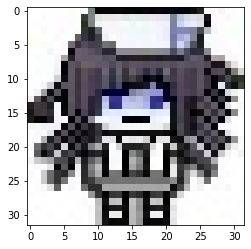

70


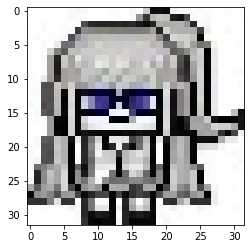

71


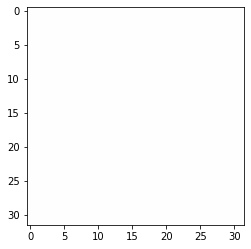

72


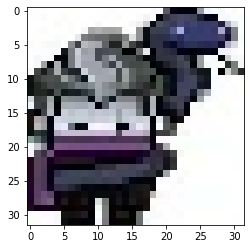

73


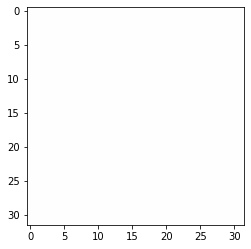

74


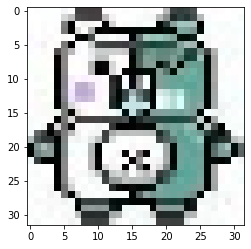

75


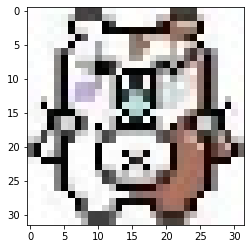

76


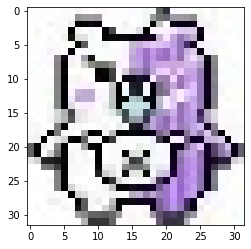

77


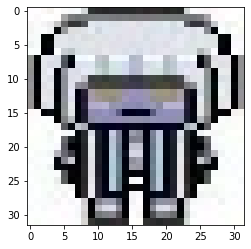

78


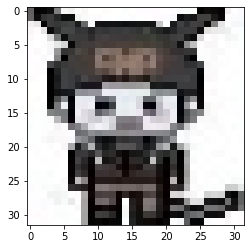

79


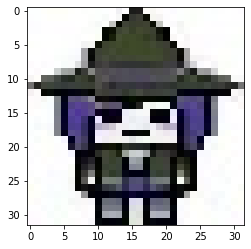

80


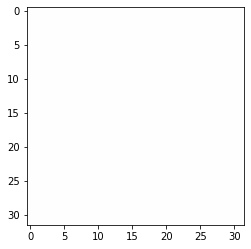

81


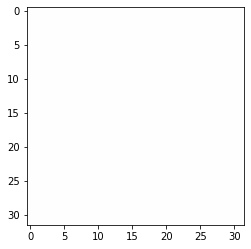

82


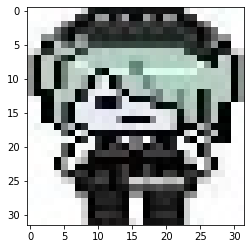

83


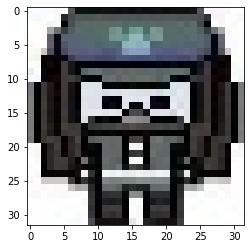

84


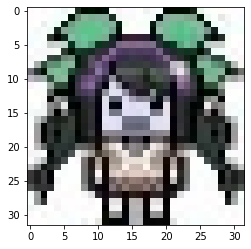

85


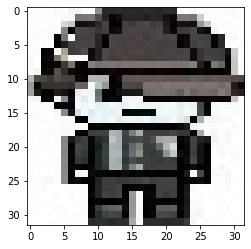

86


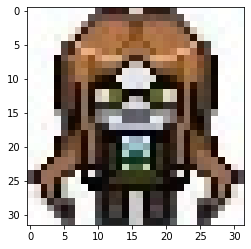

87


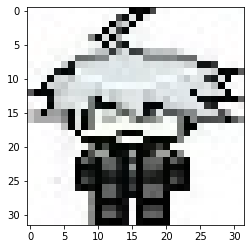

88


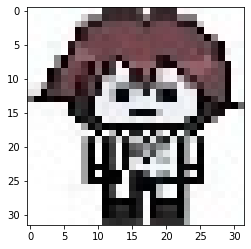

89


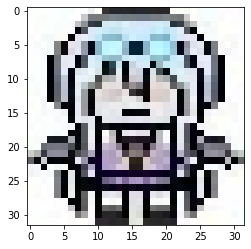

90


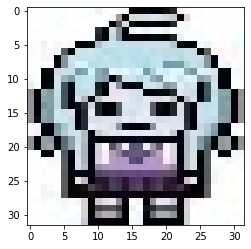

91


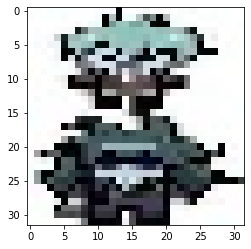

92


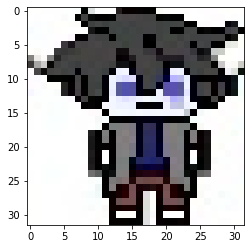

93


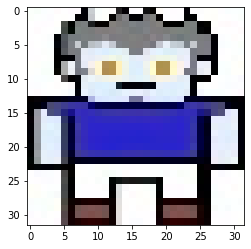

94


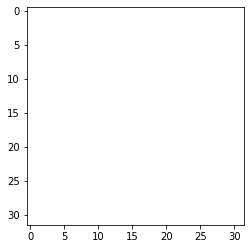

95


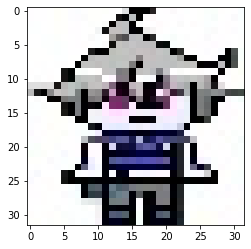

96


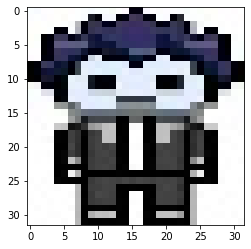

97


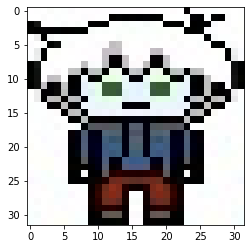

98


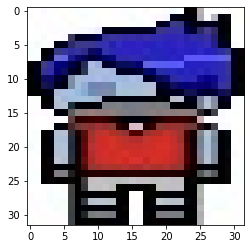

99


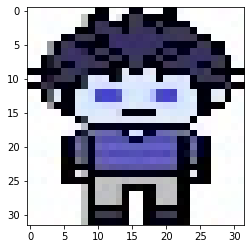

100


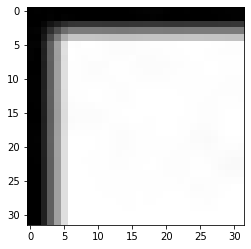

101


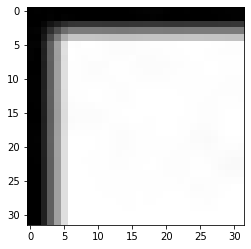

103


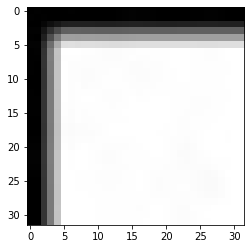

105


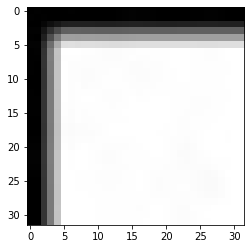

106


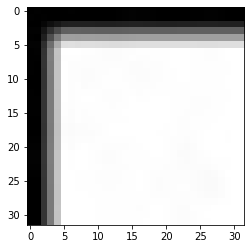

107


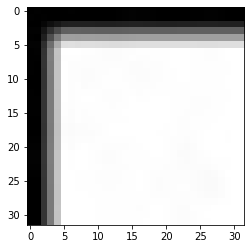

108


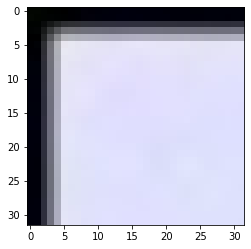

110


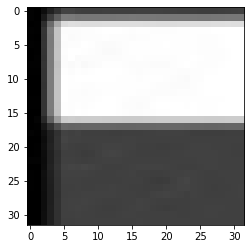

111


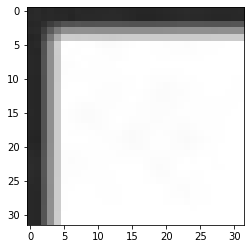

112


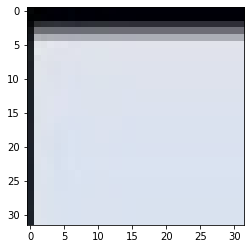

113


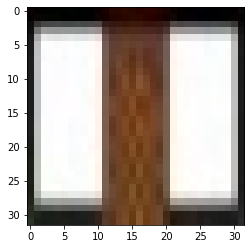

114


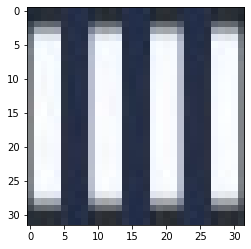

115


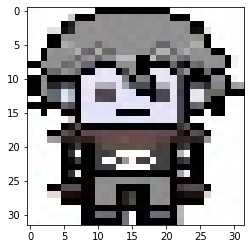

116


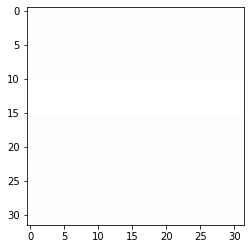

117


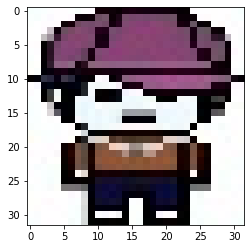

118


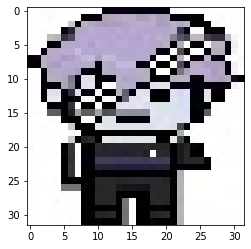

119


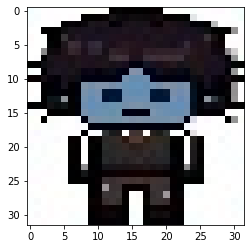

120


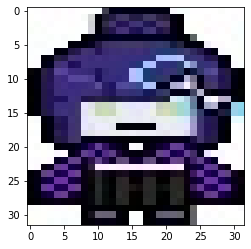

121


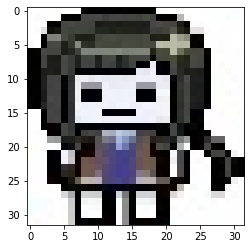

122


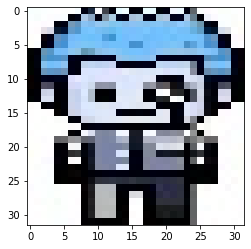

123


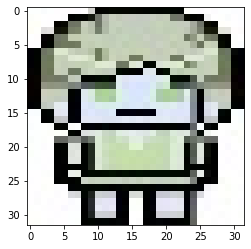

124


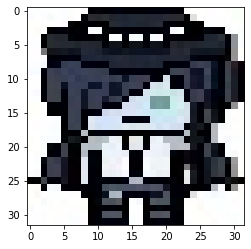

125


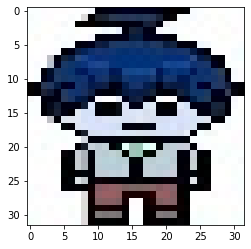

126


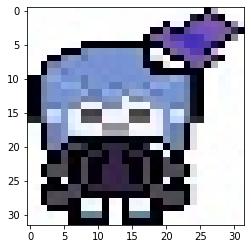

127


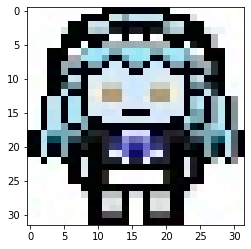

128


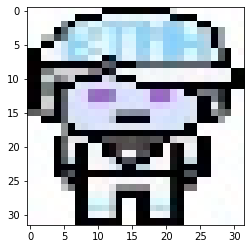

129


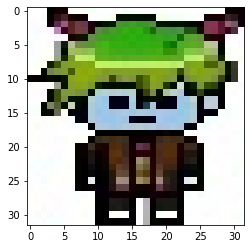

130


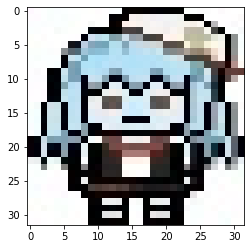

131


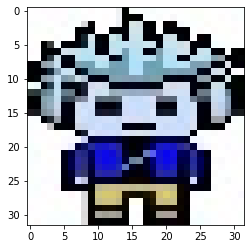

132


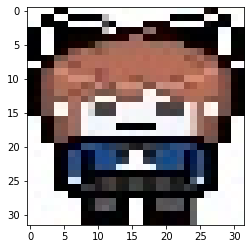

133


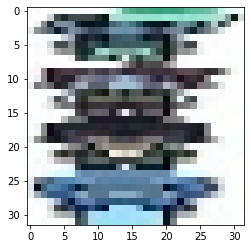

134


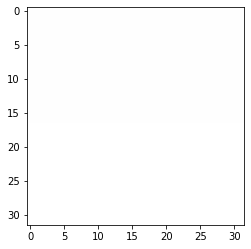

135


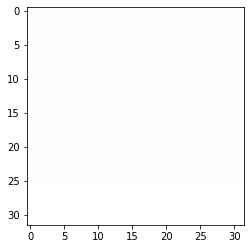

136


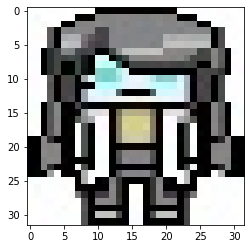

137


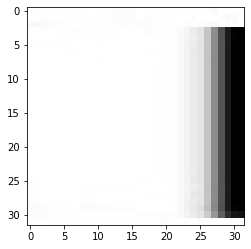

138


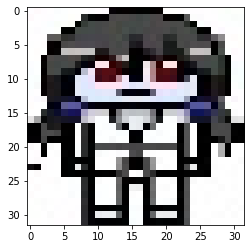

139


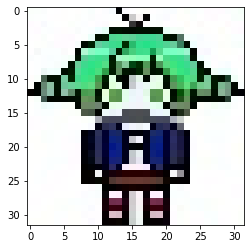

140


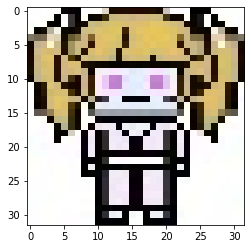

141


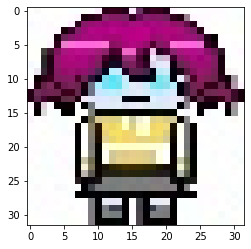

142


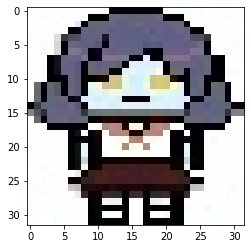

143


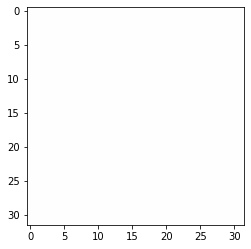

144


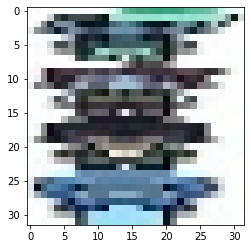

145


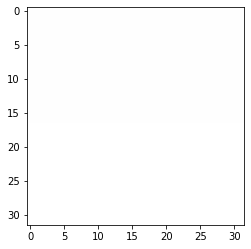

146


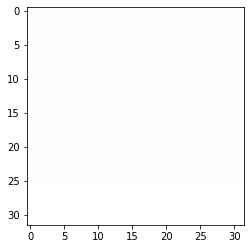

147


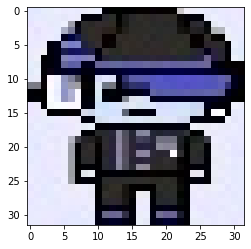

148


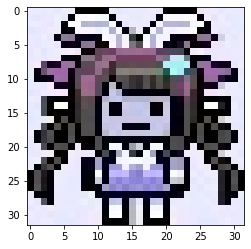

149


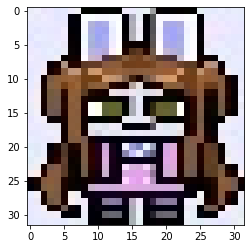

150


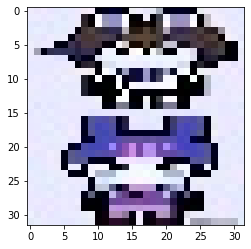

151


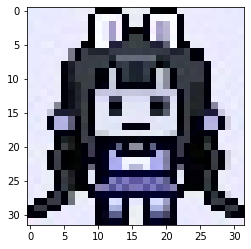

152


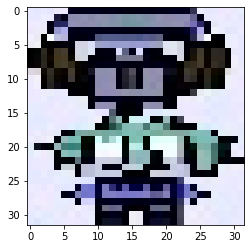

153


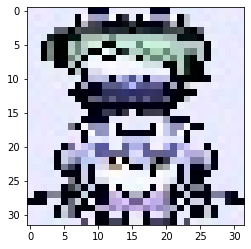

154


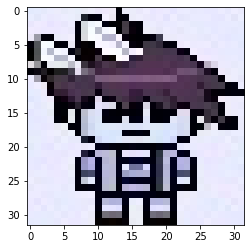

155


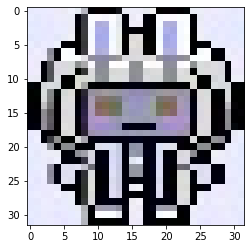

156


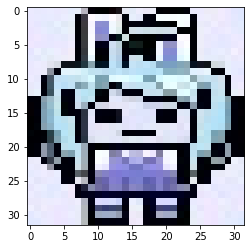

157


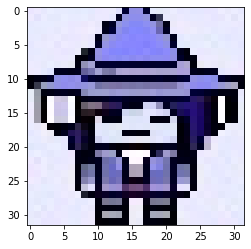

158


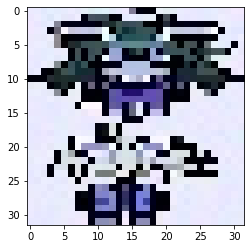

159


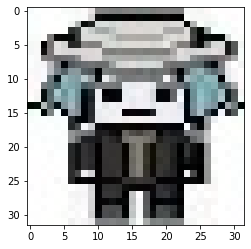

160


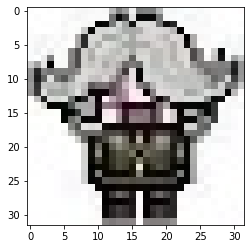

161


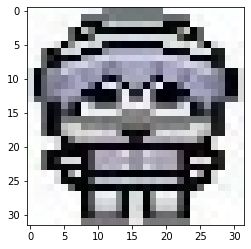

162


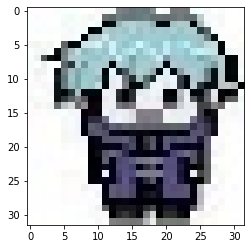

163


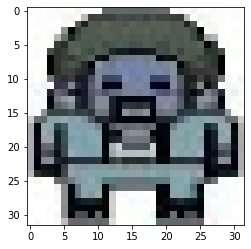

164


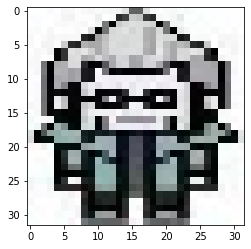

165


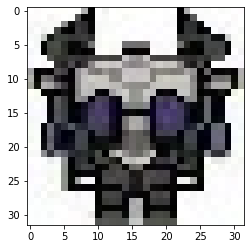

166


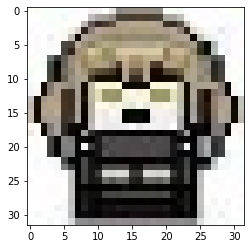

167


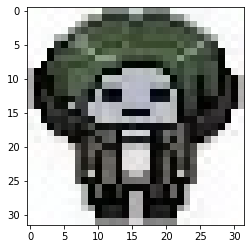

168


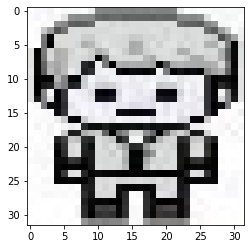

169


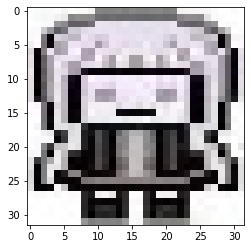

170


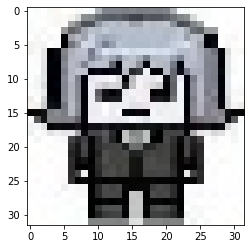

171


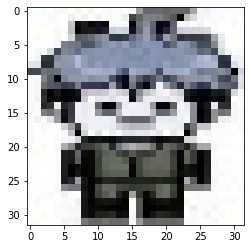

172


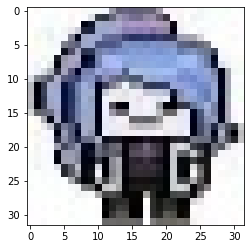

173


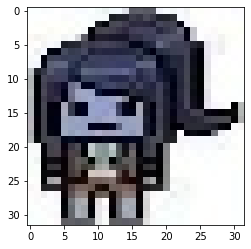

174


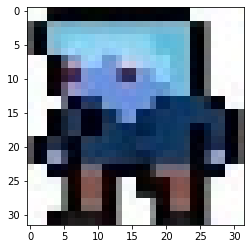

175


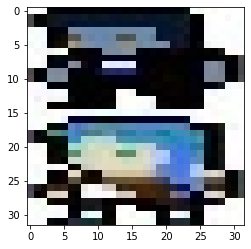

176


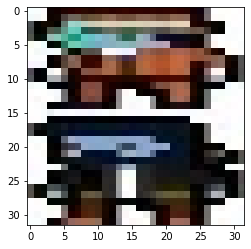

177


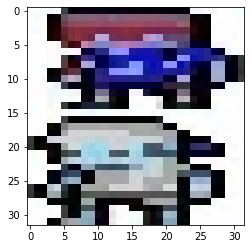

178


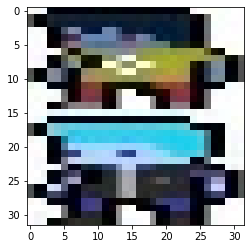

179


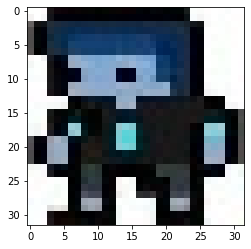

180


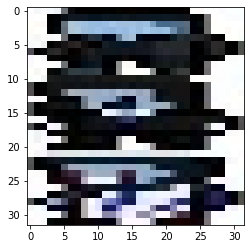

181


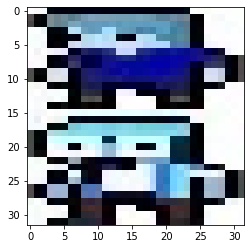

182


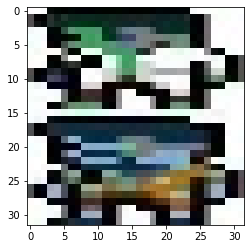

183


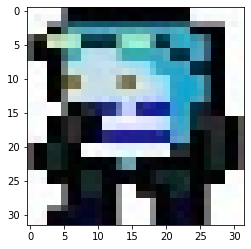

184


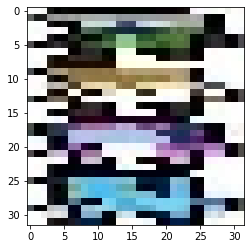

185


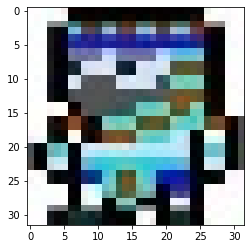

186


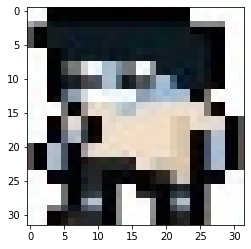

187


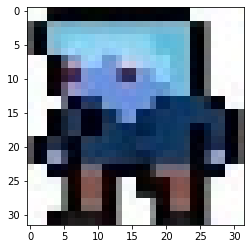

188


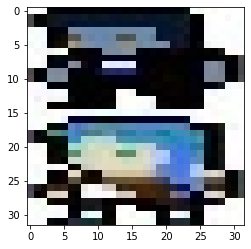

189


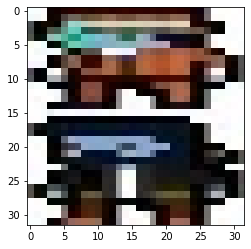

190


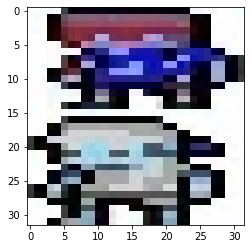

191


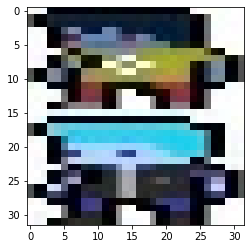

192


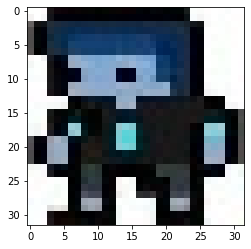

193


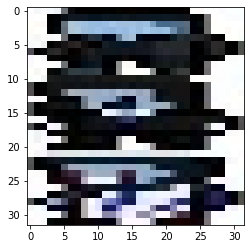

194


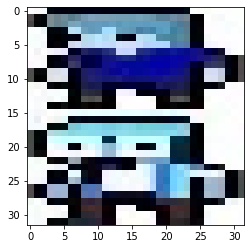

195


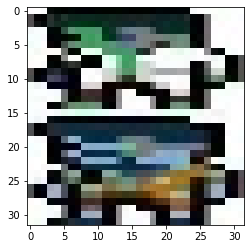

196


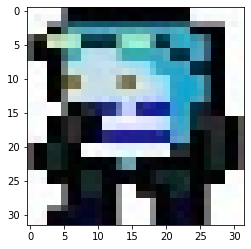

197


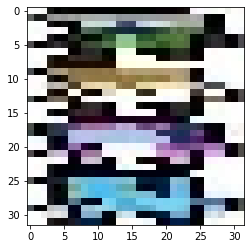

198


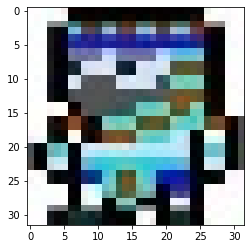

199


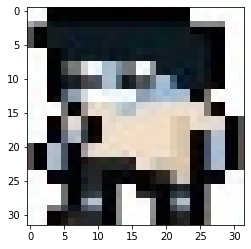

200


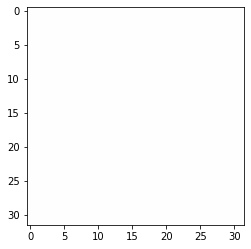

201


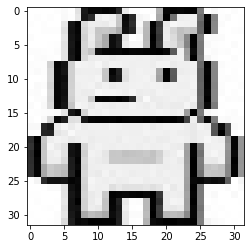

202


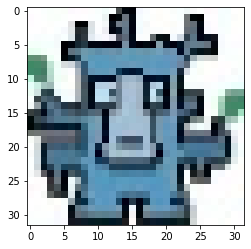

203


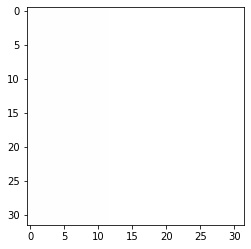

204


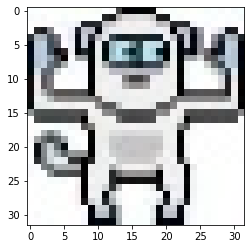

205


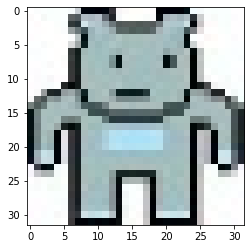

206


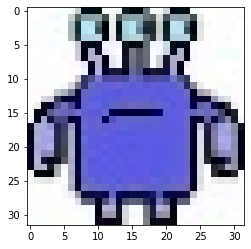

207


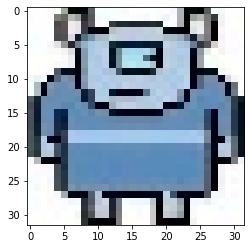

208


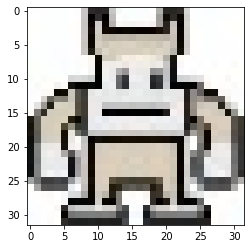

209


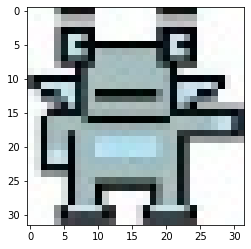

210


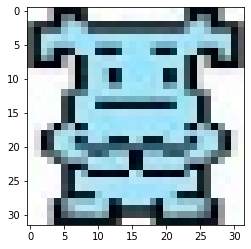

211


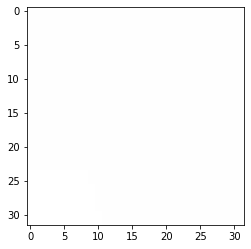

212


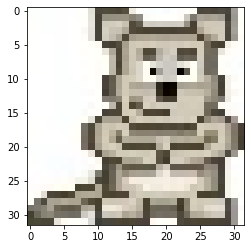

213


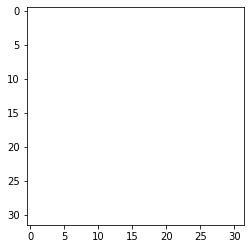

214


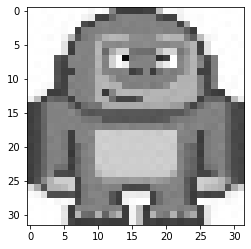

215


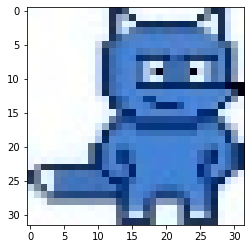

216


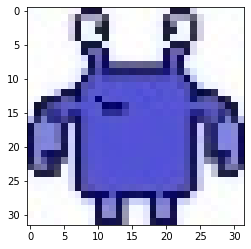

217


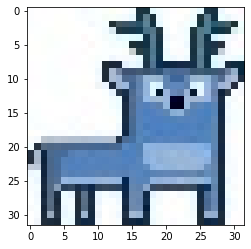

218


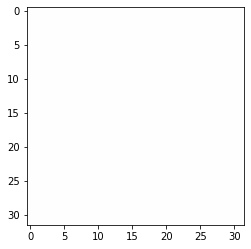

219


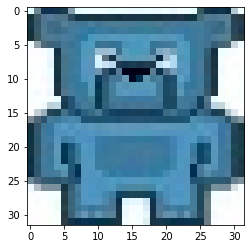

220


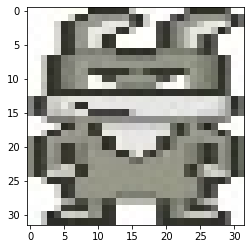

221


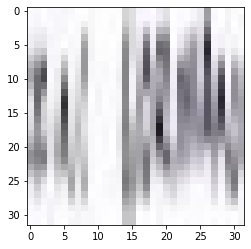

222


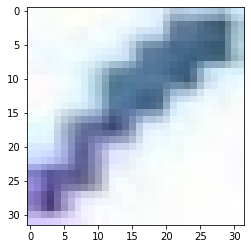

223


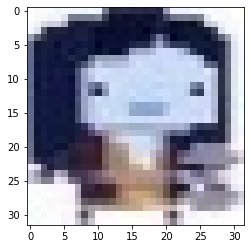

224


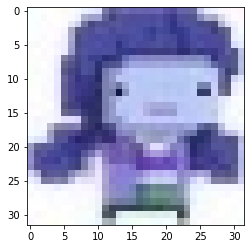

225


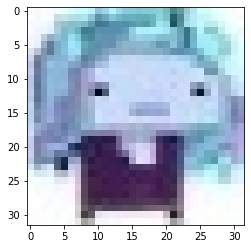

226


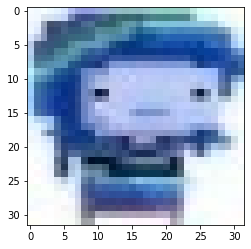

227


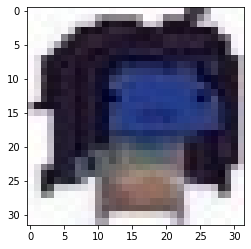

228


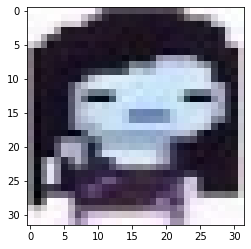

229


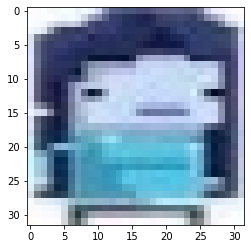

230


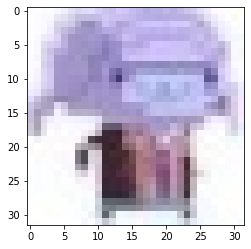

231


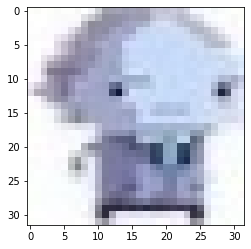

232


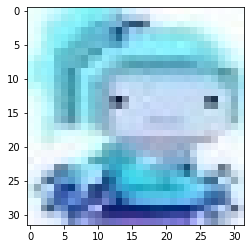

233


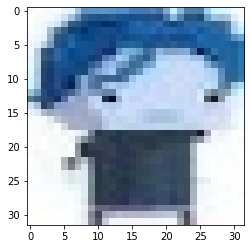

234


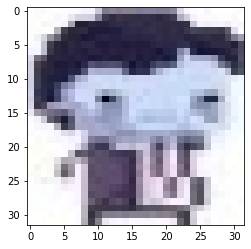

235


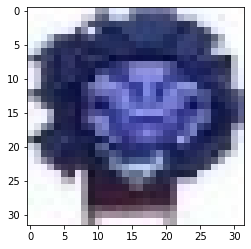

236


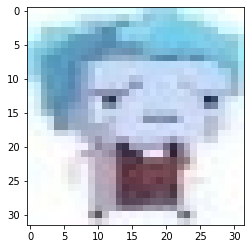

237


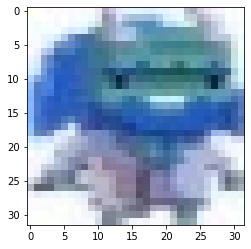

238


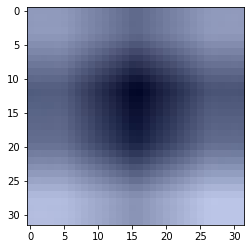

239


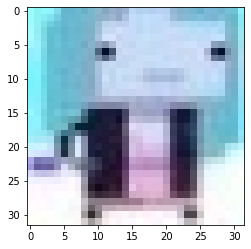

240


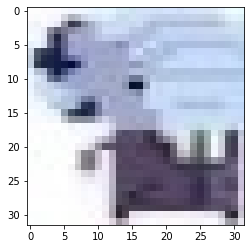

241


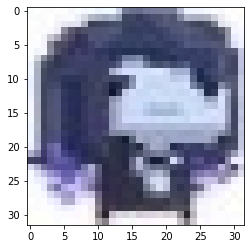

242


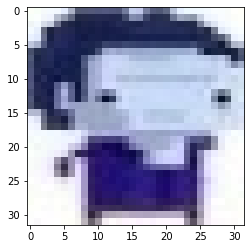

243


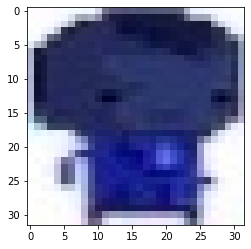

244


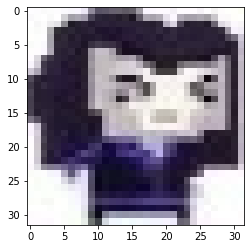

245


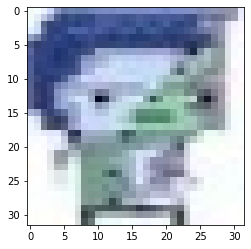

246


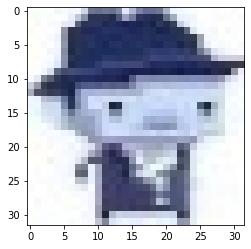

247


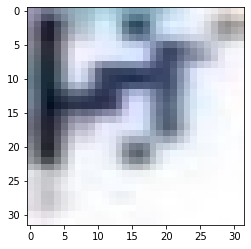

248


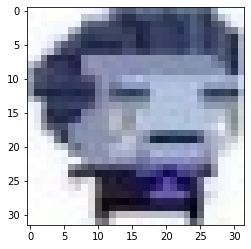

249


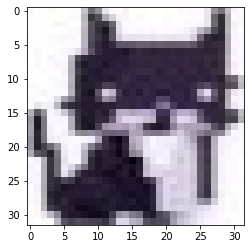

250


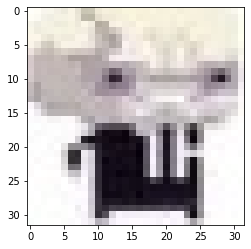

251


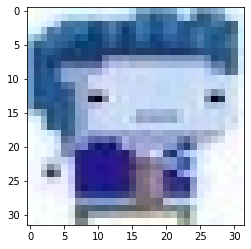

252


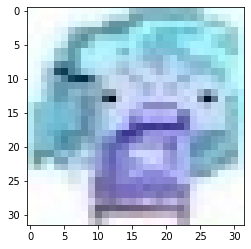

253


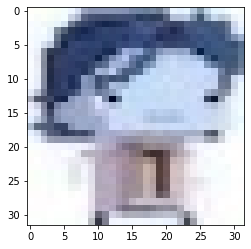

254


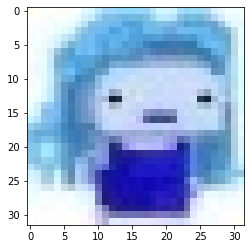

255


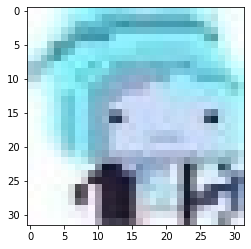

256


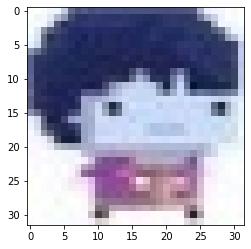

257


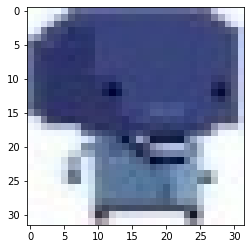

258


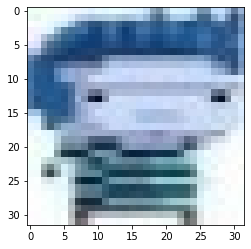

259


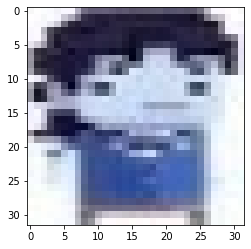

260


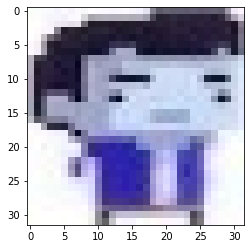

261


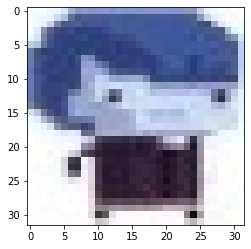

262


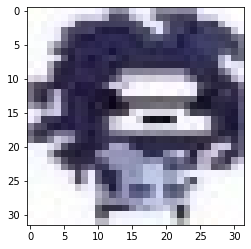

263


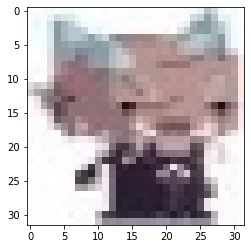

264


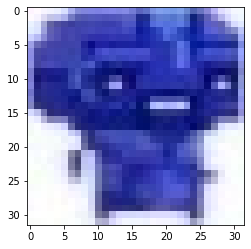

265


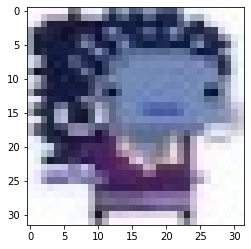

266


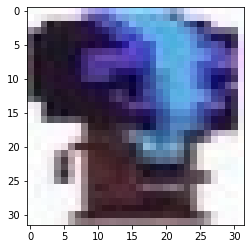

267


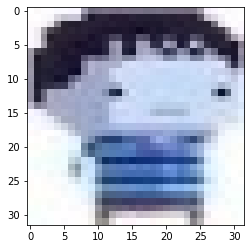

268


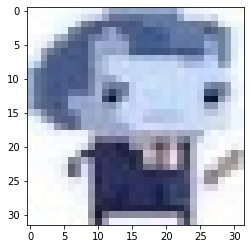

269


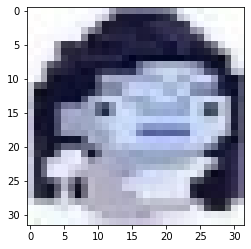

270


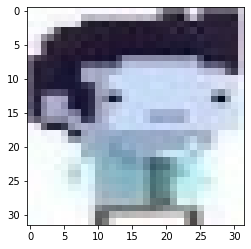

271


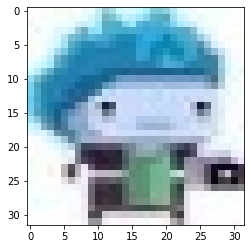

272


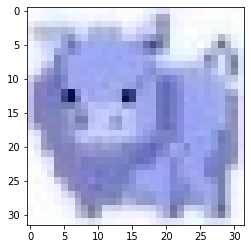

273


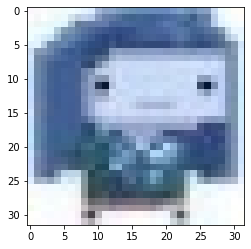

274


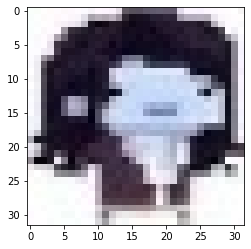

275


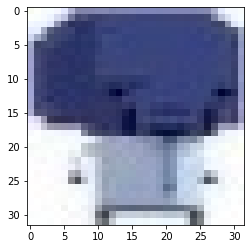

276


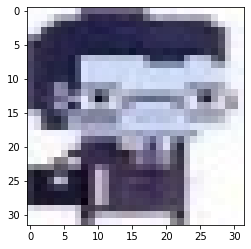

277


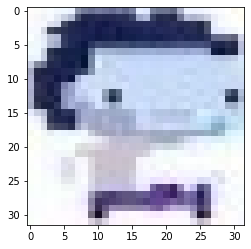

278


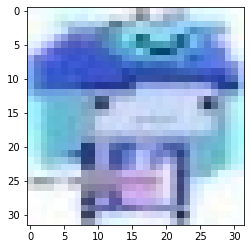

279


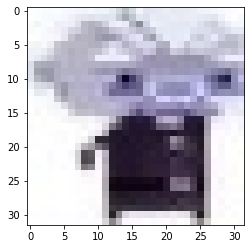

280


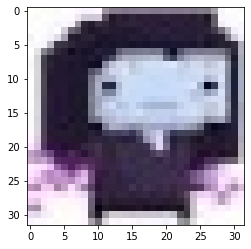

281


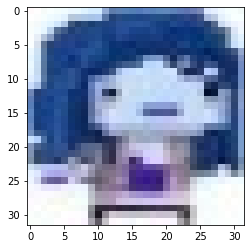

282


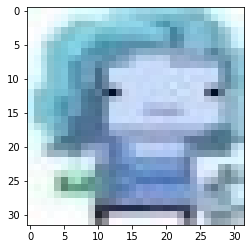

283


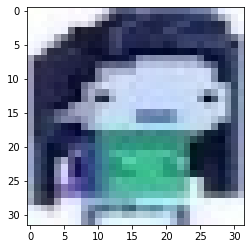

284


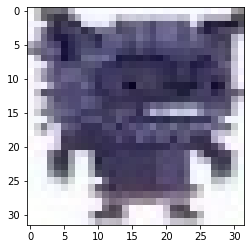

285


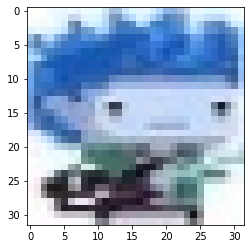

286


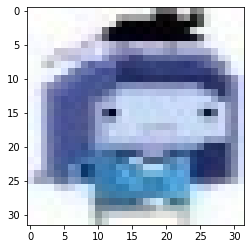

287


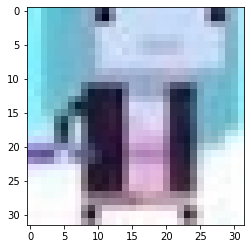

288


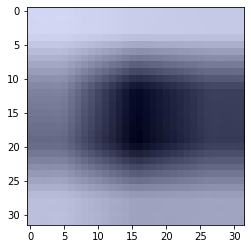

289


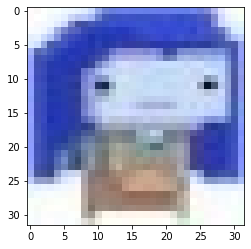

290


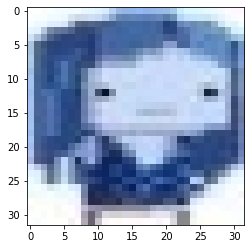

291


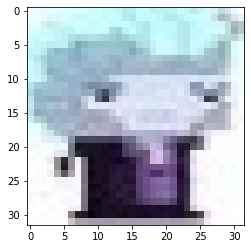

292


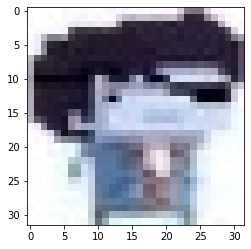

293


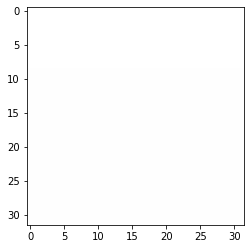

294


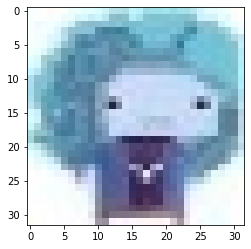

295


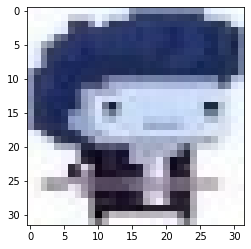

296


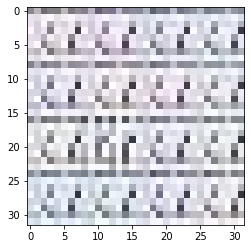

297


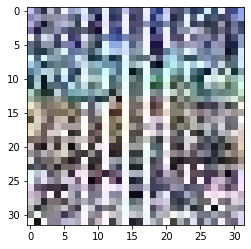

298


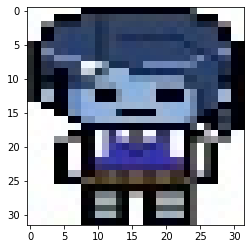

299


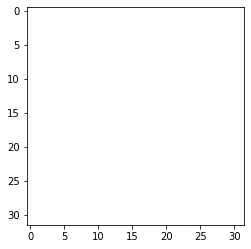

300


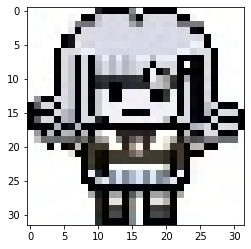

301


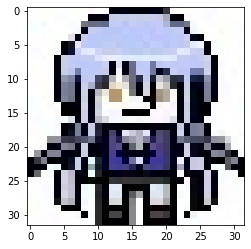

302


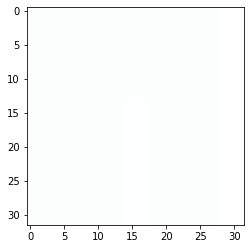

303


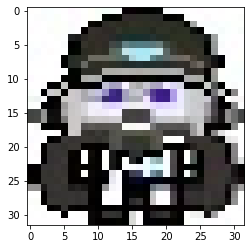

304


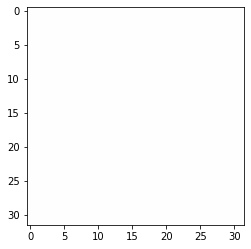

305


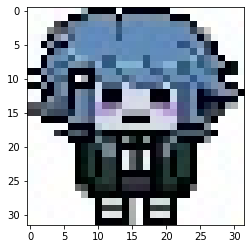

306


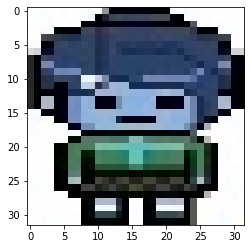

307


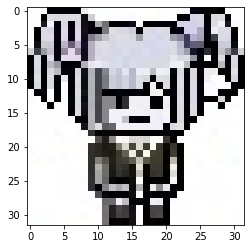

308


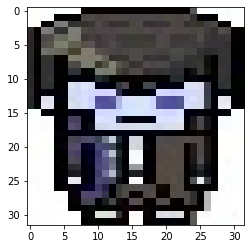

309


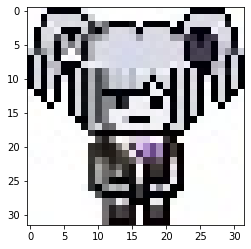

310


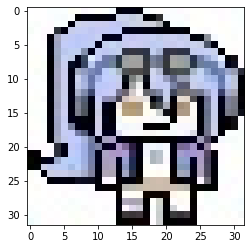

311


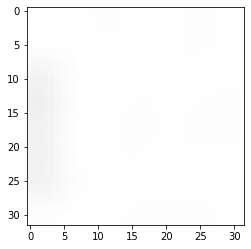

312


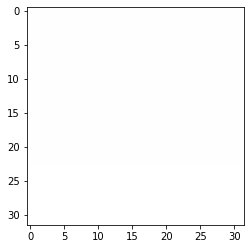

313


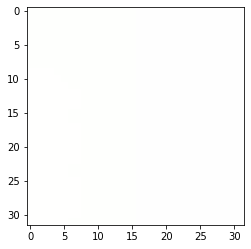

314


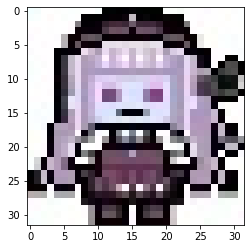

315


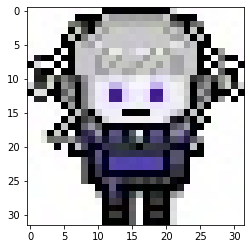

316


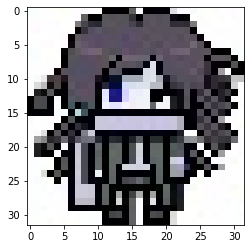

317


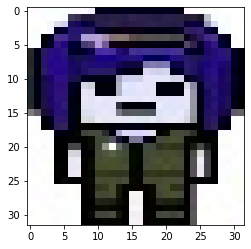

318


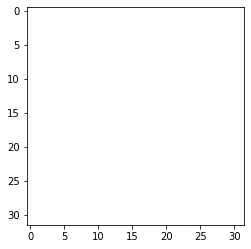

319


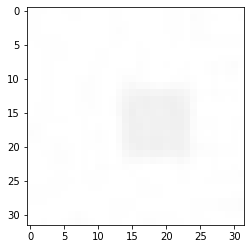

320


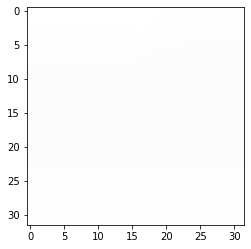

321


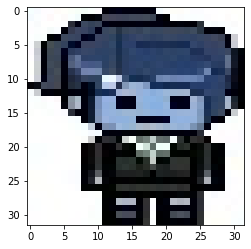

322


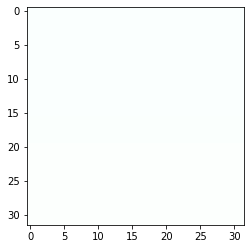

323


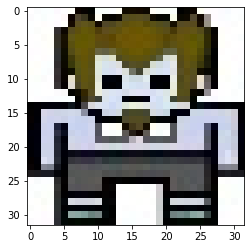

324


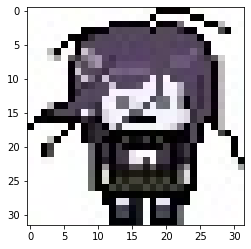

325


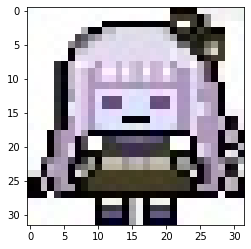

326


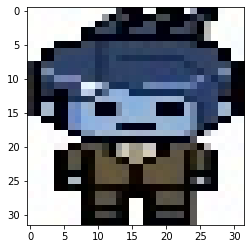

327


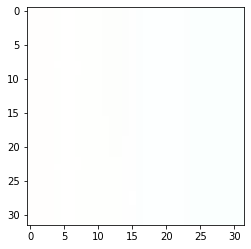

328


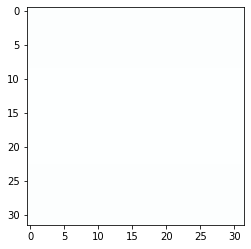

329


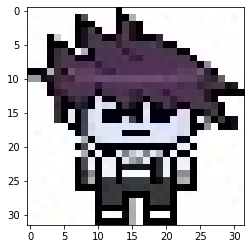

330


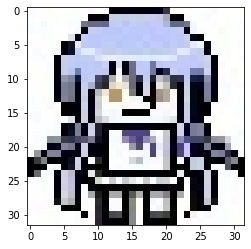

331


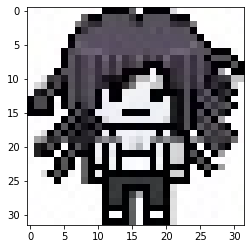

332


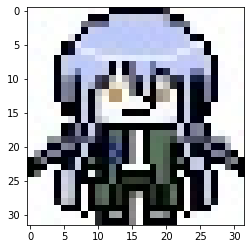

333


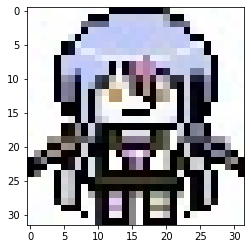

334


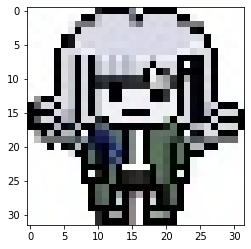

335


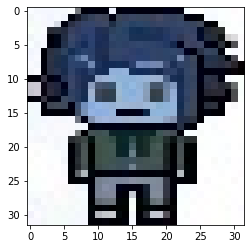

336


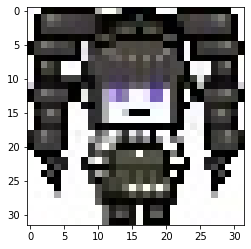

337


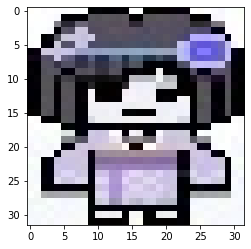

338


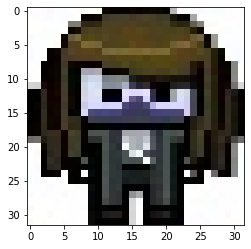

339


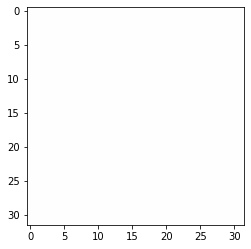

340


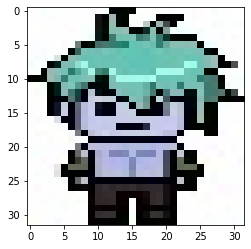

341


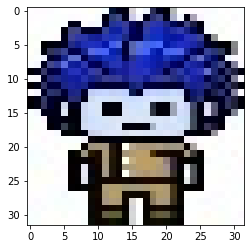

342


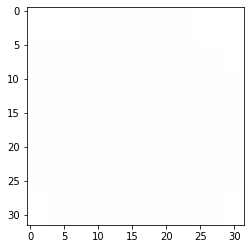

343


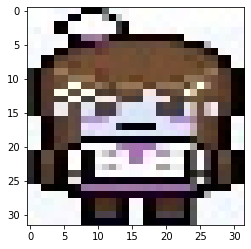

344


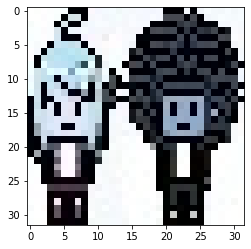

345


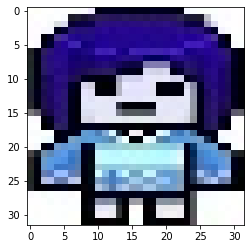

346


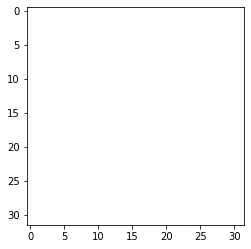

347


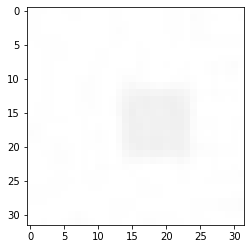

348


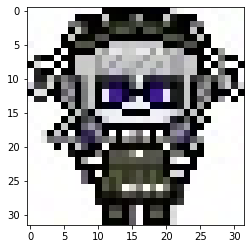

349


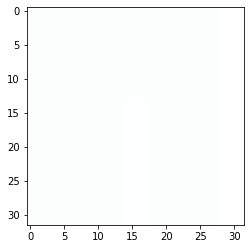

350


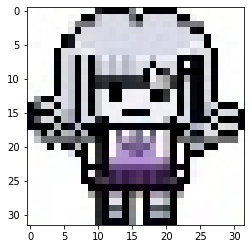

351


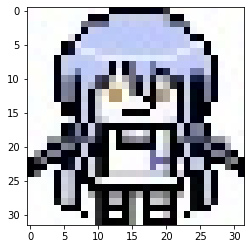

352


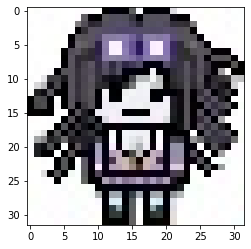

353


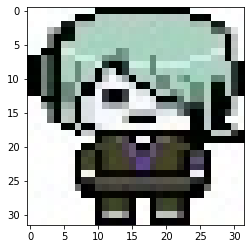

354


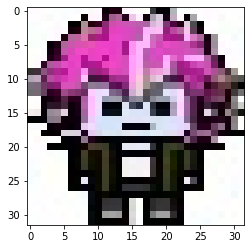

355


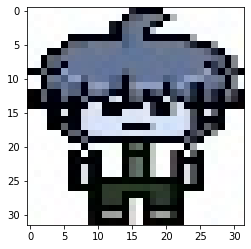

356


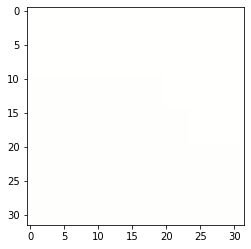

357


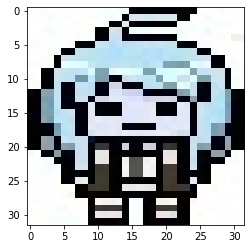

358


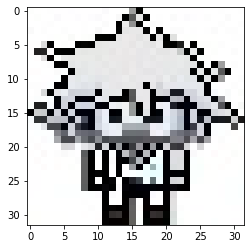

359


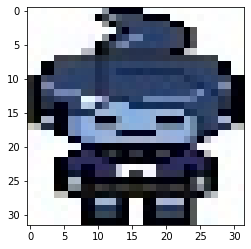

360


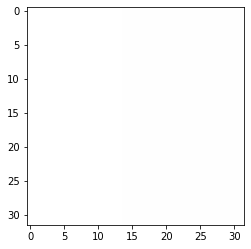

361


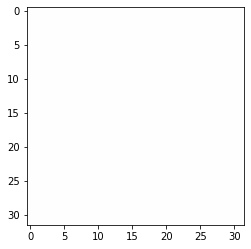

362


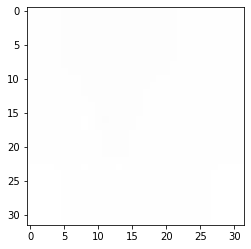

363


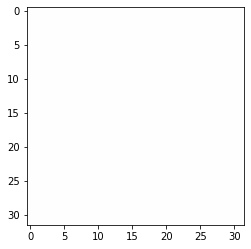

364


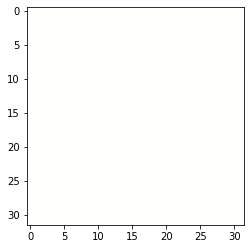

365


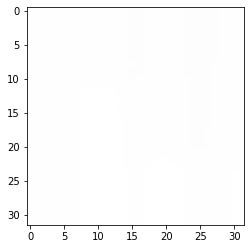

366


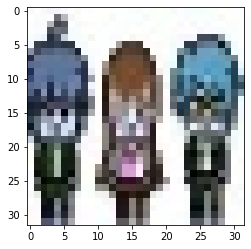

367


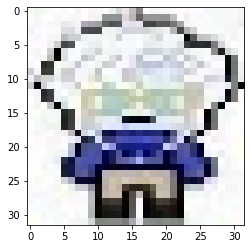

368


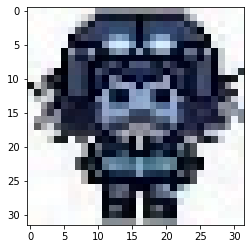

369


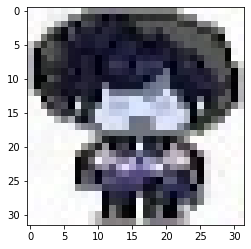

370


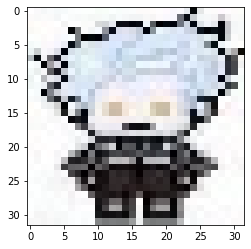

371


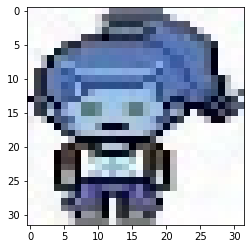

372


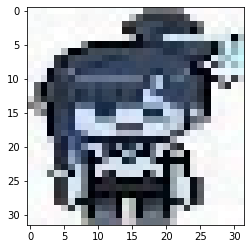

373


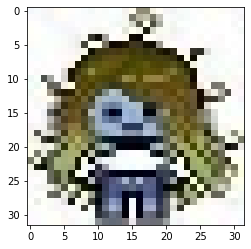

374


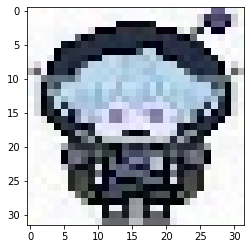

375


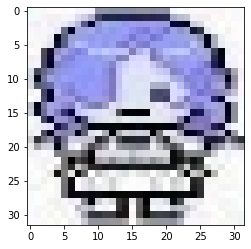

376


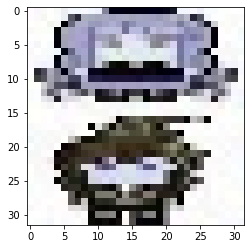

377


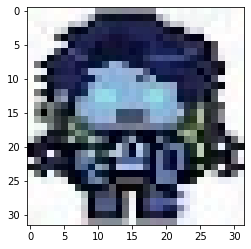

378


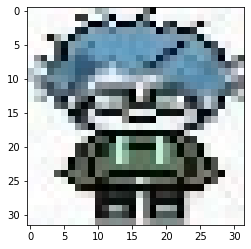

379


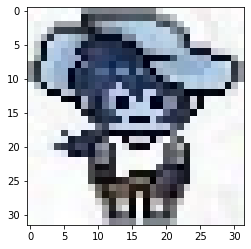

380


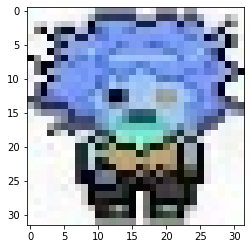

381


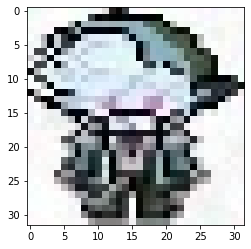

382


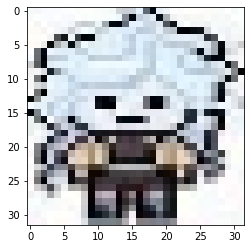

383


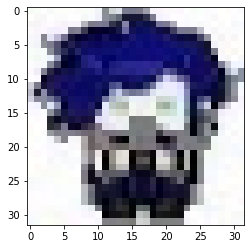

384


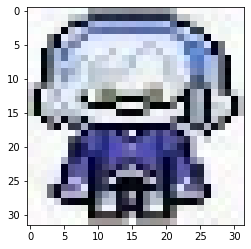

385


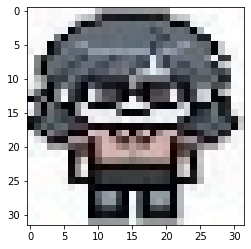

386


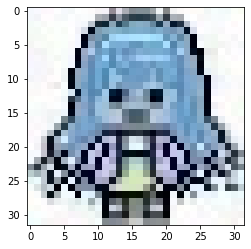

387


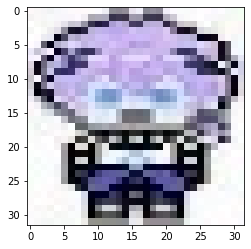

388


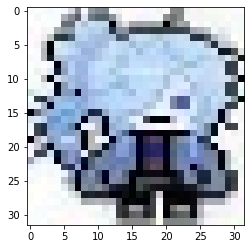

389


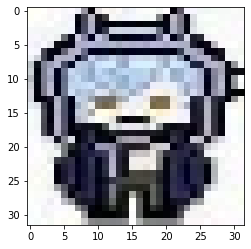

390


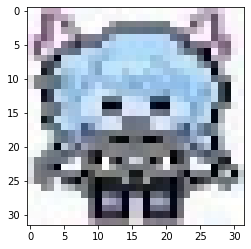

391


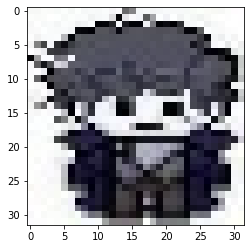

392


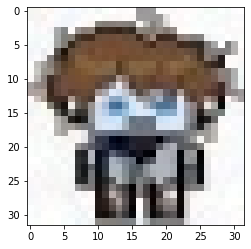

393


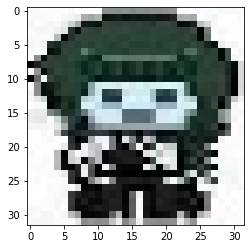

394


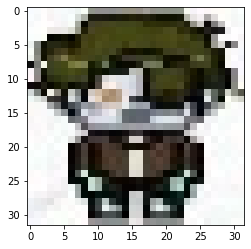

395


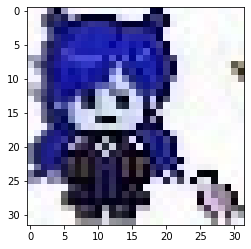

396


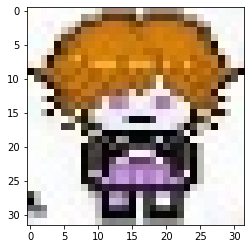

397


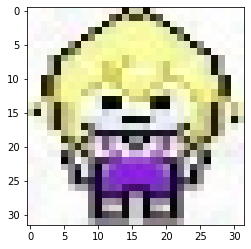

398


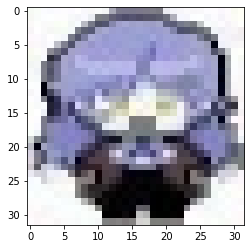

399


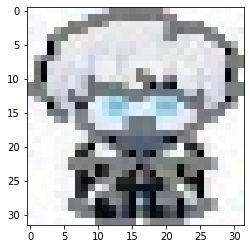

400


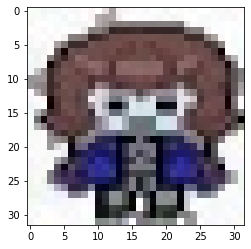

401


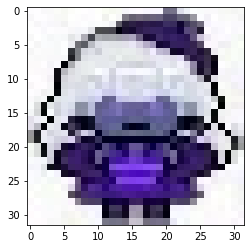

402


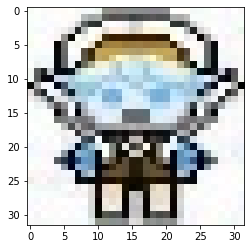

403


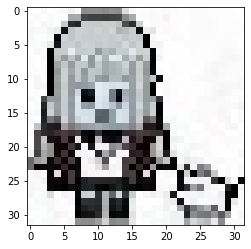

404


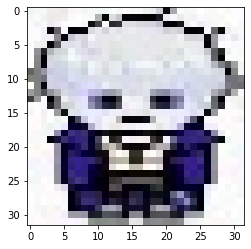

405


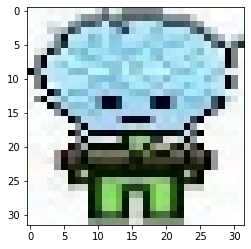

406


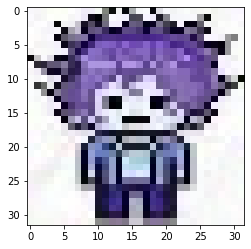

407


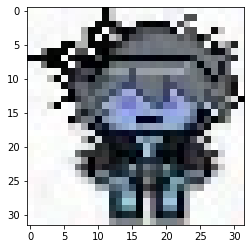

408


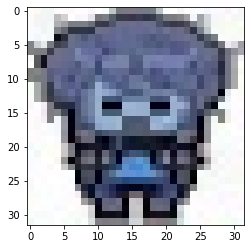

409


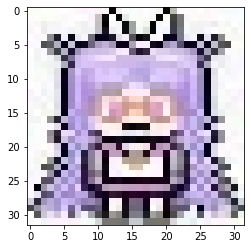

410


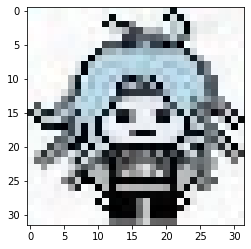

411


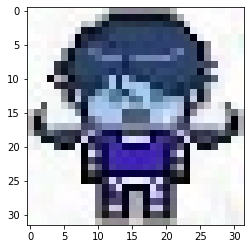

412


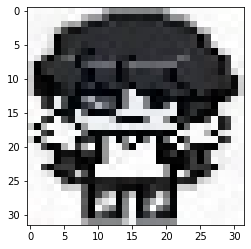

413


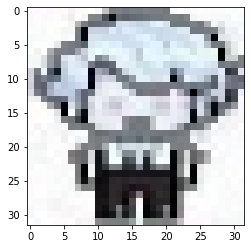

414


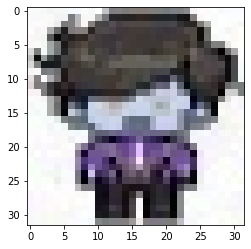

415


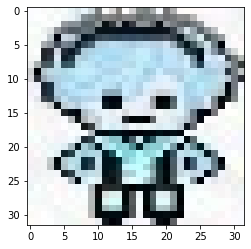

416


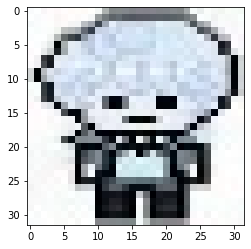

417


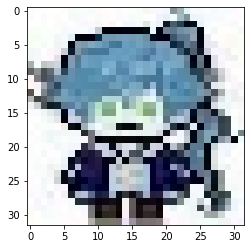

418


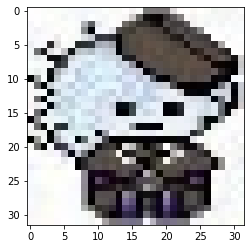

419


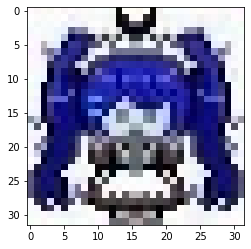

420


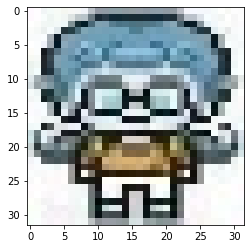

421


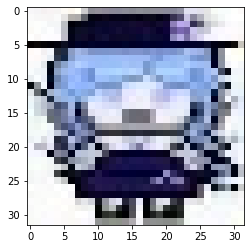

422


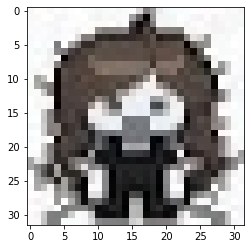

423


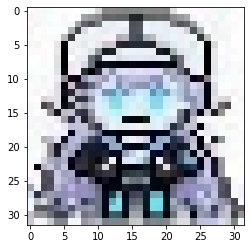

424


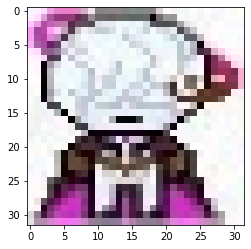

425


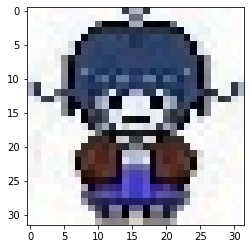

426


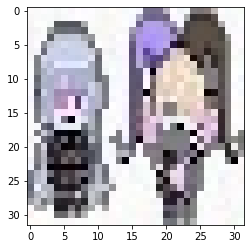

427


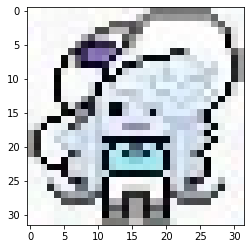

428


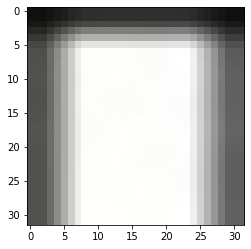

429


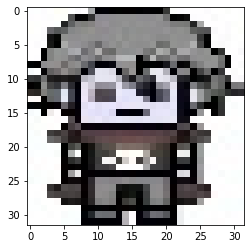

430


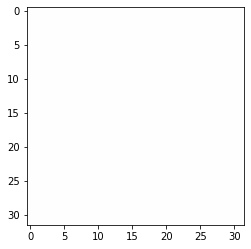

431


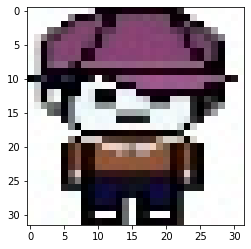

432


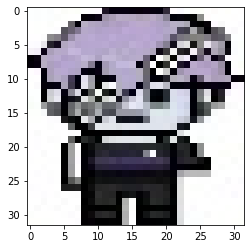

433


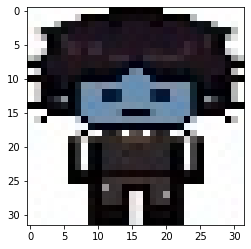

434


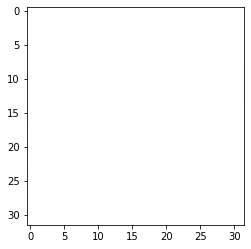

435


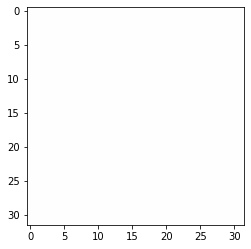

436


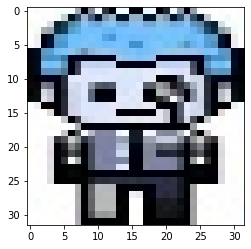

437


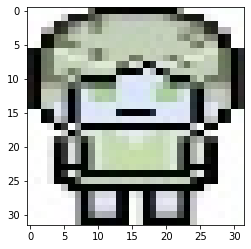

438


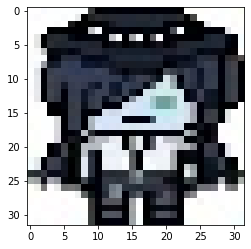

439


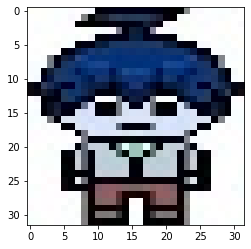

440


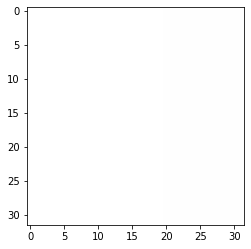

441


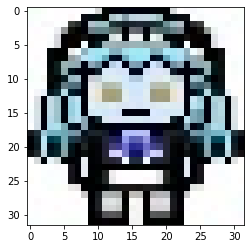

442


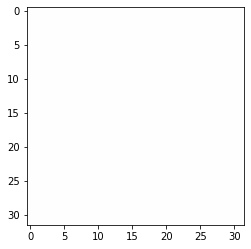

443


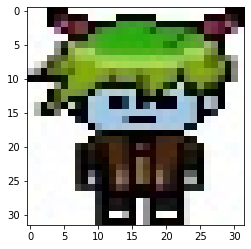

444


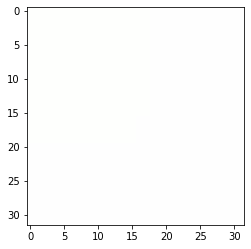

445


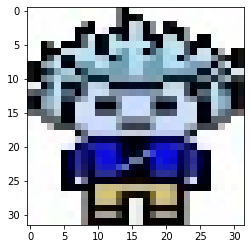

446


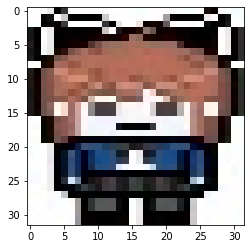

552


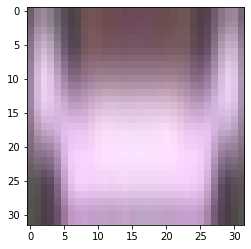

580


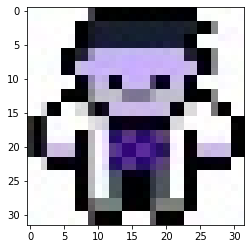

581


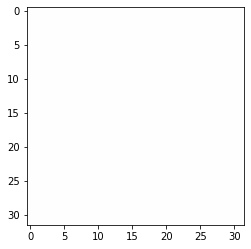

582


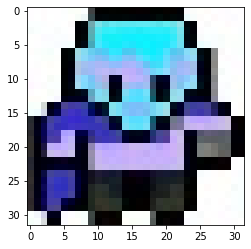

583


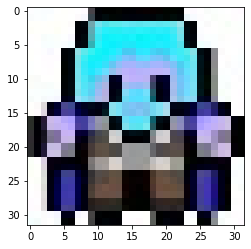

584


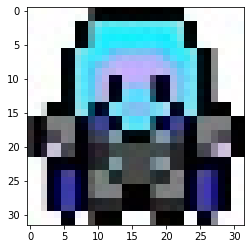

585


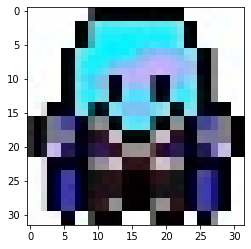

586


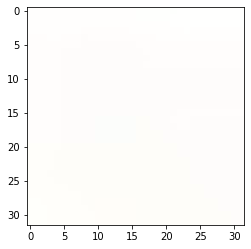

587


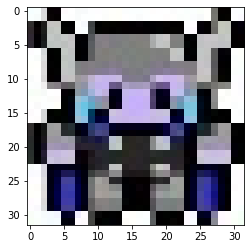

588


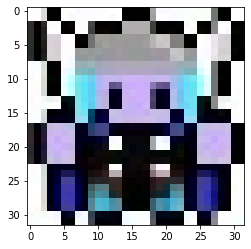

589


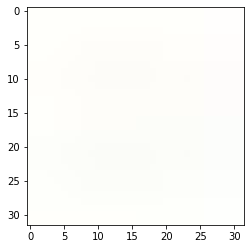

590


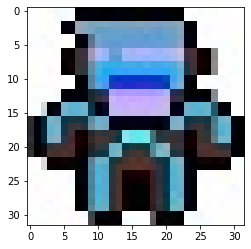

591


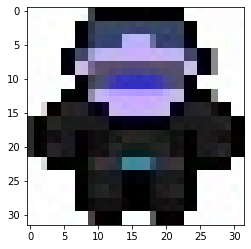

592


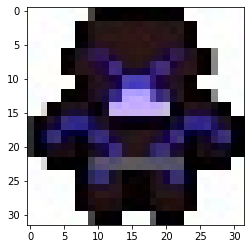

593


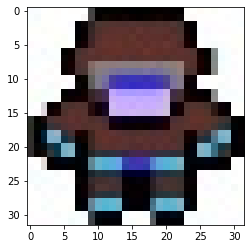

594


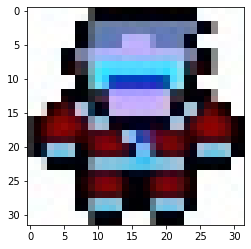

595


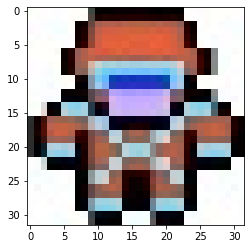

596


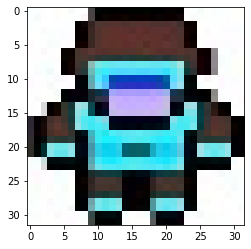

597


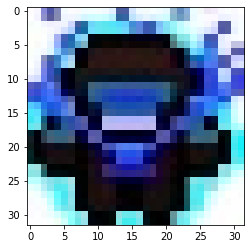

598


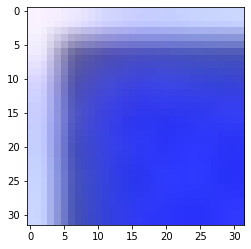

599


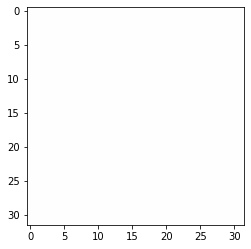

600


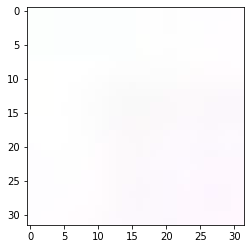

601


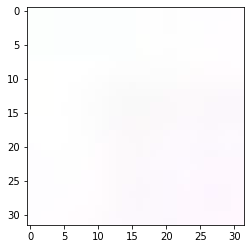

602


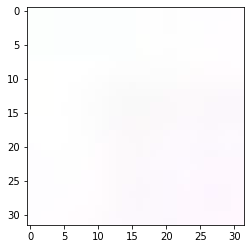

603


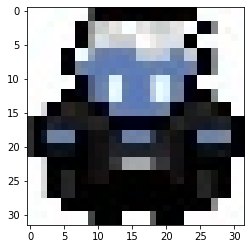

604


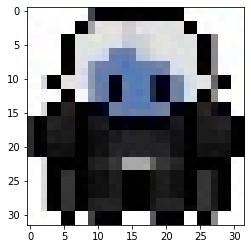

605


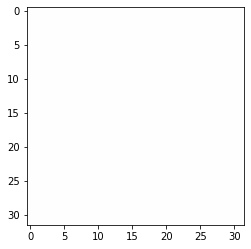

606


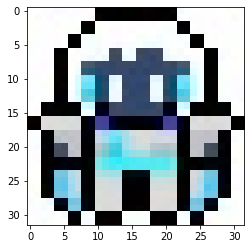

607


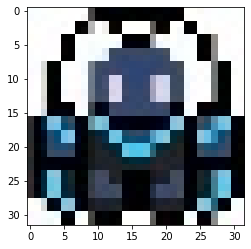

608


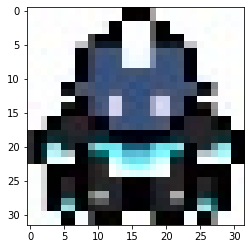

609


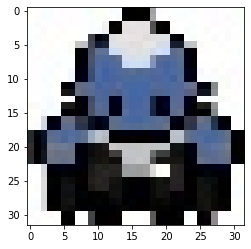

610


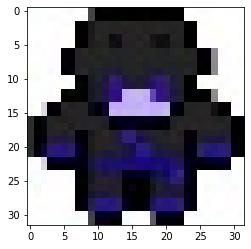

611


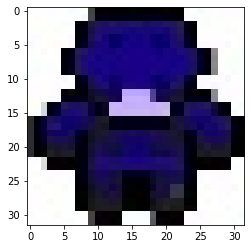

612


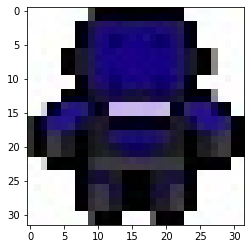

613


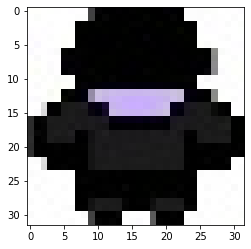

614


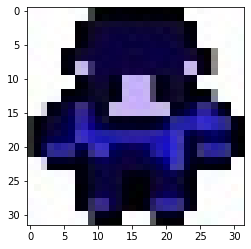

615


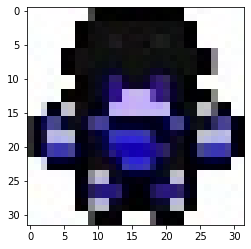

616


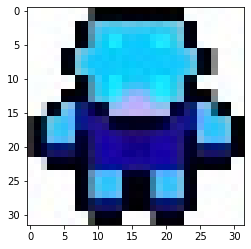

617


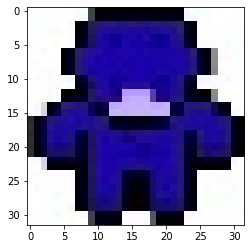

618


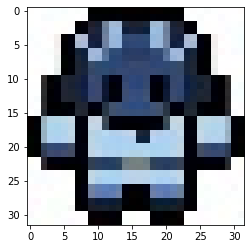

619


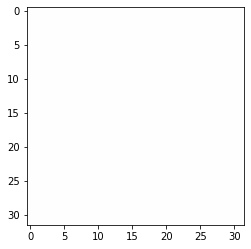

620


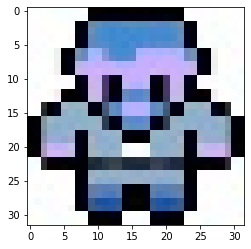

621


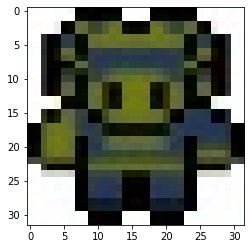

622


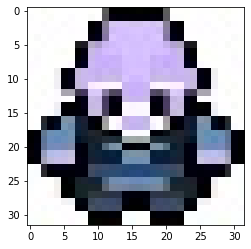

623


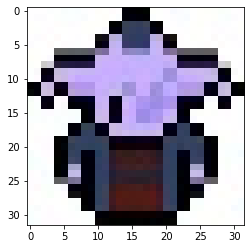

624


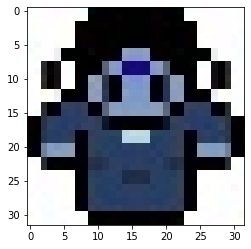

625


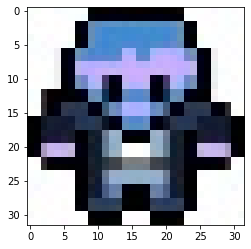

626


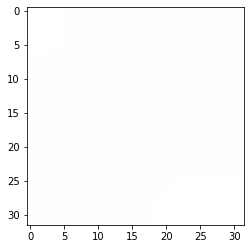

627


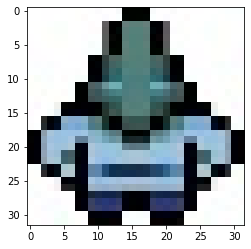

628


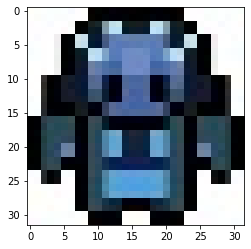

629


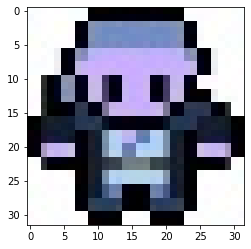

630


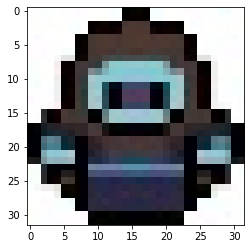

631


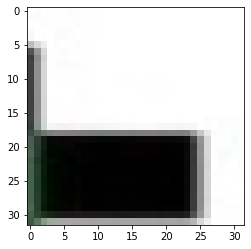

632


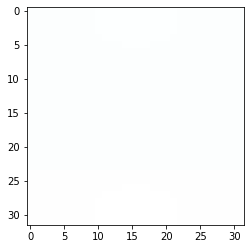

633


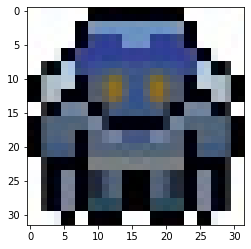

634


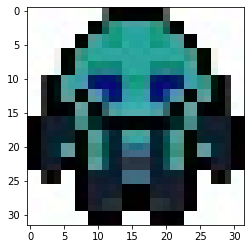

635


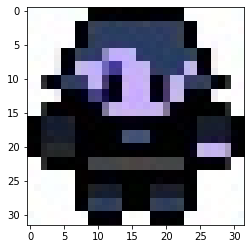

636


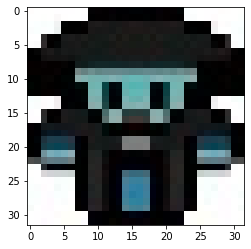

637


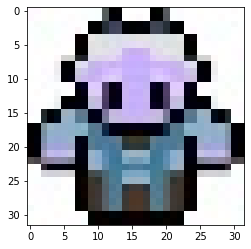

638


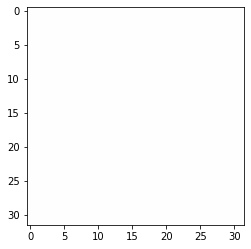

639


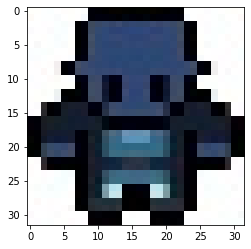

640


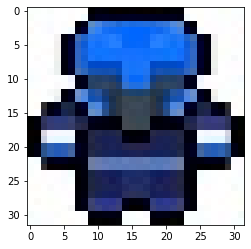

641


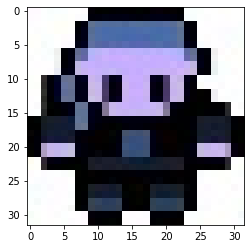

642


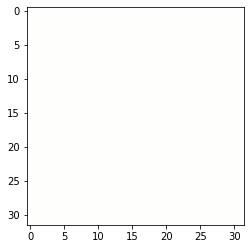

643


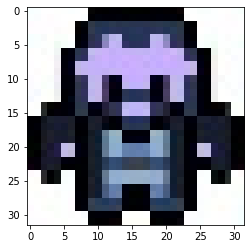

644


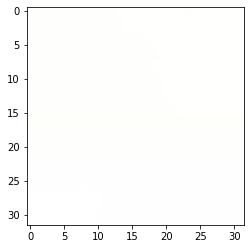

645


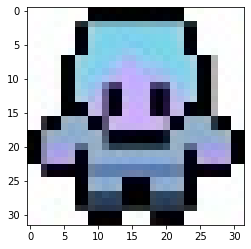

646


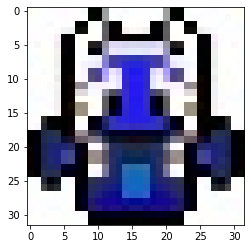

647


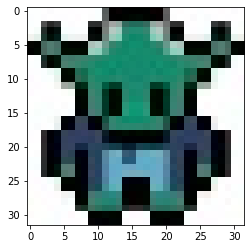

648


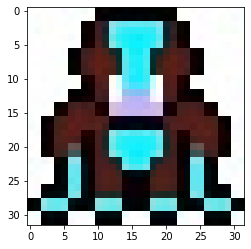

649


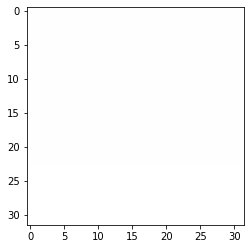

650


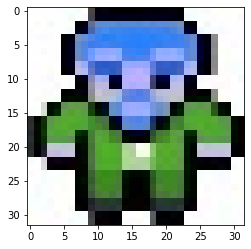

651


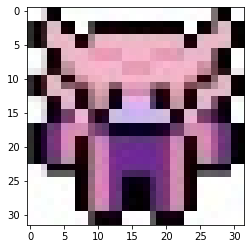

652


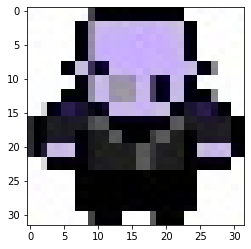

653


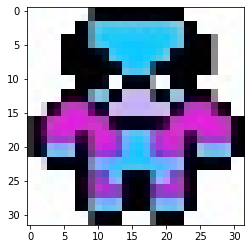

654


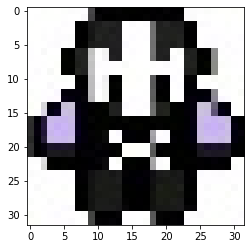

655


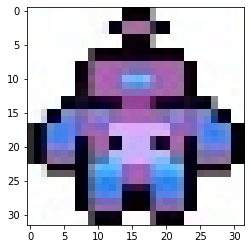

656


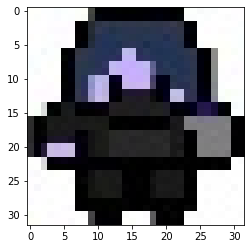

657


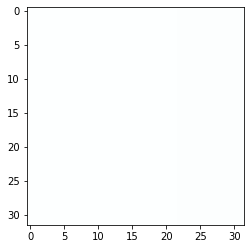

658


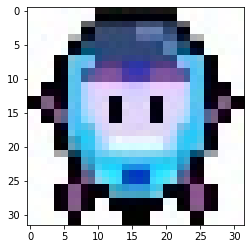

659


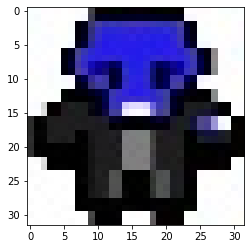

660


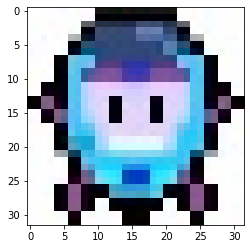

661


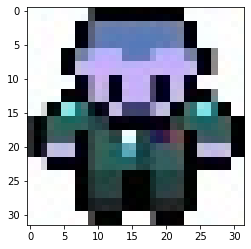

662


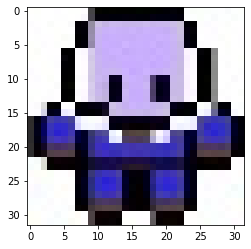

663


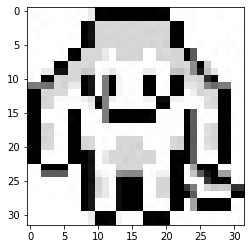

664


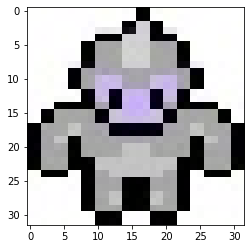

665


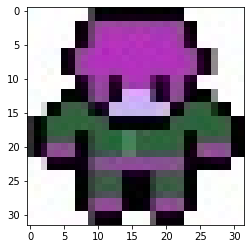

666


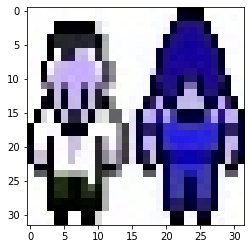

667


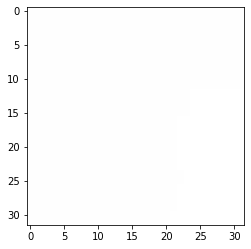

668


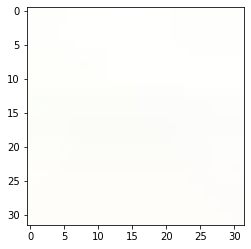

In [157]:
for i, j in enumerate(faces_df):
    if conc[i, 2]!=0:
       # if (conc[i, 0] < 3000 and conc[i, 1] < 1000 and conc[i, 1] > -2000 and conc[i, 0] > -2000):
        print(i)
        plt.imshow(j)
        plt.show()

In [121]:
max(x_3d[:, 0])

5743.238189157814

In [103]:
np.where(x_3d[:, 0] > 2000, x_3d)

ValueError: either both or neither of x and y should be given

In [108]:
pd.array(x_3d)

ValueError: PandasArray must be 1-dimensional.